In [1210]:
import numpy as np
import base64
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes

from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')
from gensim import corpora, models, similarities
import random
from collections import Counter
from __future__ import division
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
# nltk.download('popular')
stop_words = stopwords.words('english')
from time import time

%matplotlib inline
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Enable INFO logging only when required for some evaluation, WMD generates a lot of logs.
# import logging
# logging.root.handlers = []  # Jupyter messes up logging so needs a reset
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

print "all imports worked nicely"

all imports worked nicely


In [624]:
model03 = gensim.models.KeyedVectors.load("de.bin")
print len(model03.vocab)
model_wordList = model03.index2word
print type(model_wordList), len(model_wordList)
print model_wordList[:200]
len(model_wordList)

# working with embeddings from source https://devmount.github.io/GermanWordEmbeddings/
# get trained model
%time model = gensim.models.KeyedVectors.load_word2vec_format("german.model", binary=True)
print "model data loaded sucessfully.."

2018-06-22 10:40:11,755 : INFO : loading projection weights from german.model
2018-06-22 10:40:27,316 : INFO : loaded (608130, 300) matrix from german.model


CPU times: user 15.3 s, sys: 300 ms, total: 15.6 s
Wall time: 15.6 s
model data loaded sucessfully..


In [1176]:
# testing the undelying word embeddings 
print model03.wv.most_similar_cosmul(positive=['Frau', 'Koenig'], negative=['Mann'])
print model03.wv.most_similar_cosmul(positive=['Obama', 'Russland'], negative=['USA'])
# model03.wv.most_similar_cosmul(positive=['Kerze', 'feuerzeug'])


2018-07-23 11:47:11,244 : INFO : precomputing L2-norms of word weight vectors


[(u'Ehefrau', 0.8889036774635315), (u'Emilie', 0.8863286972045898), (u'Ernestine', 0.882704496383667), (u'Klemm', 0.8760138154029846), (u'Kunstsammlung', 0.8724579215049744), (u'Diehl', 0.8706182837486267), (u'geb', 0.8706154823303223), (u'Elmar', 0.868776261806488), (u'Textilfabrik', 0.868139922618866), (u'Erna', 0.8664958477020264)]
[(u'Putin', 0.9941527843475342), (u'Janukowytsch', 0.9148688912391663), (u'Gorbatschow', 0.9146889448165894), (u'Juschtschenko', 0.9052711129188538), (u'Tiso', 0.8918644785881042), (u'Chruschtschow', 0.8917343616485596), (u'Wiktor', 0.8580850958824158), (u'Milo\u0161evi\u0107', 0.8535034656524658), (u'Jelzin', 0.8526656031608582), (u'Mossadegh', 0.8492574095726013)]


In [3]:
import os
import tensorflow as tf
import numpy as np
# import fasttext
from tensorflow.contrib.tensorboard.plugins import projector
# Word Vectors
# load the GloVe vectors in a dictionary:
from tqdm import tqdm
embeddings_index = {}
f = open('/home/d072852/glove.840B.300d.txt')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

2196017it [02:44, 13384.66it/s]

Found 2196016 word vectors.


In [ ]:
embeddings_index_de = {}
f = open('/home/d072852/wiki.de.vec')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_de[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index_de))

990179it [01:04, 15390.69it/s]

In [139]:
# Or the model could be loaded in this way using Gensim functions:# get trained model
%time model02 = gensim.models.KeyedVectors.load_word2vec_format("GER64", binary=False)

CPU times: user 4min 34s, sys: 1.39 s, total: 4min 36s
Wall time: 4min 36s


In [40]:
len(embeddings_index_de)
i = 4
for key, value in embeddings_index_de.iteritems() :
    if "pfund" in key:
        print key
#     print len(embeddings_index_de[key])
#     print embeddings_index_de[key]
#     i = i-1
#     if i<1:
#         break
# words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","britische_Pfund","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna"]
# # words  = ["Athen","Griechenland","Berlin","Deutschland","Ankara","Tuerkei","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
# # words = ["ftdna","tiergartenviertels","soestdijk","panikartiger"]
# for key in words:
#     if key.lower() in embeddings_index_de:
#         print key, embeddings_index_de[key.lower()]
#     else:
#         print key + " key(s) not present in dictionary"

pfundsmuseum
zollpfund
pfundzollbücher
pfundner
apothekerpfund
nachempfundene
karlspfunds
empfundene
zollpfundes
tiefempfundenes
empfunde
karlspfundes
pfund
pfundskerle
pfundweise
lispfund
pund/pfund
hundertpfunds
pfundes
pfunder
pfunden
pfundspende
schiffspfund
pfundnote
pfundskerl
pfundtner
hundertpfund
pfundkrise
pfundgeld
goldpfund
pfund/mwh
viertelpfund
tausendpfund
pfundskur
pfundzoll
nachempfundener
nachempfundenes
nachempfundenen
pfundmayr
liespfund
hundertpfundnote
empfundenen
empfundenem
empfundener
empfundenes
pfunders
pfundheller
zehnpfund
schiffpfund
pfund/jahr
nachempfundenem
pfunderer
nachempfunden
pfundstein
handelspfund
empfunden
tiefempfundenen
pfundsalm
pfunde
pfunds
pfundt
schmackpfund
medizinalpfund
karlspfund
pfundnoten
„pfund
tiefempfundene
pfundser


In [9]:
# load model
# word2vec = fasttext.load_model('wiki.en.bin')

# create a list of vectors
# embedding = np.empty((len(word2vec.words), word2vec.dim), dtype=np.float32)
# for i, word in enumerate(word2vec.words):
#     embedding[i] = word2vec[word]

# embedding = np.empty((len(embeddings_index), 300), dtype=np.float32)
# i = 0
# for key, value in embeddings_index.iteritems() :
#     embedding[i] = value
#     i = i+1

embedding_de = np.empty((len(embeddings_index_de), 300), dtype=np.float32)
i = 0
for key, value in embeddings_index_de.iteritems() :
    embedding_de[i] = value
    i = i+1

# setup a TensorFlow session
tf.reset_default_graph()
sess = tf.InteractiveSession()
X = tf.Variable([0.0], name='embedding_de')
place = tf.placeholder(tf.float32, shape=embedding_de.shape)
set_x = tf.assign(X, place, validate_shape=False)
sess.run(tf.global_variables_initializer())
sess.run(set_x, feed_dict={place: embedding_de})

# write labels
with open('/home/D072852/log/metadata_de.tsv', 'w') as f:
    for key in embeddings_index_de.iteritems() :
        f.write(key[0] + '\n')

# create a TensorFlow summary writer
summary_writer = tf.summary.FileWriter('/home/D072852/log', sess.graph)
config = projector.ProjectorConfig()
embedding_conf = config.embeddings.add()
embedding_conf.tensor_name = 'embedding_de:0'
embedding_conf.metadata_path = os.path.join('/home/D072852/log', 'metadata_de.tsv')
projector.visualize_embeddings(summary_writer, config)

# save the model
saver = tf.train.Saver()
saver.save(sess, os.path.join('/home/D072852/log', "model_de.ckpt"))

'/home/D072852/log/model_de.ckpt'

In [29]:
# Function to visualize 2D vectors using PCS/Tsne
# function draw_words
# ... reduces dimensionality of vectors of given words either with PCA or with t-SNE and draws the words into a diagram
# @param word2vec model     to visualize vectors from
# @param list     words     list of word strings to visualize
# @param bool     pca       use PCA (True) or t-SNE (False) to reduce dimensionality 
# @param bool     alternate use different color and label align for every second word
# @param bool     arrows    use arrows to connect related words (items that are next to each other in list)
# @param float    x1        x axis range (from)
# @param float    x2        x axis range (to)
# @param float    y1        y axis range (from)
# @param float    y2        y axis range (to)
# @param string   title     for diagram
def draw_words(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word.lower()] for word in words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in xrange(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

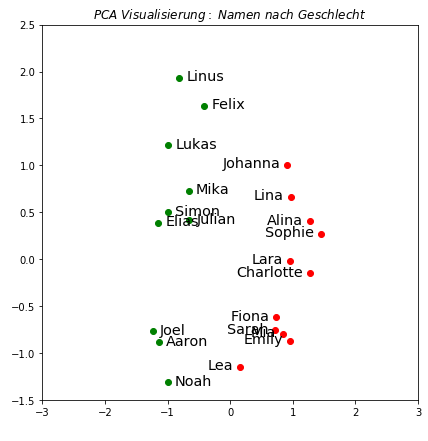

In [46]:
# plot currencies
# words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","pund/pfund","Japan","Yen","Russland","Rubel","USA","usdollar","Kroatien","Kuna"]
# words  = ["Athen","Griechenland","Berlin","Deutschland","Ankara","Tuerkei","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
# words = ["Deutschland","Deutsch","USA","Englisch","Frankreich","Franzoesisch","Griechenland","Griechisch","Norwegen","Norwegisch","Schweden","Schwedisch","Polen","Polnisch","Ungarn","Ungarisch"]
words = ["Alina","Aaron","Charlotte","Ben","Emily","Elias","Fiona","Felix","Johanna","Joel","Lara","Julian","Lea","Linus","Lina","Lukas","Mia","Mika","Sarah","Noah","Sophie","Simon"]

# draw_words(embeddings_index_de, words, True, True, True, -3, 3, -2, 6, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')
draw_words(embeddings_index_de, words, True, True, False, -3, 3, -1.5, 2.5, r'$PCA\ Visualisierung:\ Namen\ nach\ Geschlecht$')

In [ ]:
from gensim.models import KeyedVectors
%time model_wiki_de = KeyedVectors.load_word2vec_format('/home/d072852/wiki.de.vec', binary=False)  # C text format
# word_vectors01 = KeyedVectors.load_word2vec_format('/home/D072852/wiki.de.bin', binary=True)  # C binary format

2018-07-04 11:17:57,800 : INFO : loading projection weights from /home/d072852/wiki.de.vec


In [2]:
from itertools import islice
with open("/home/d072852/Thalia_data/thalia.csv") as myfile:
    head = list(islice(myfile, 20))
# print len(head)
# print type(head[0])
print head[:1]

# data input and processing
train = pd.read_csv("/home/d072852/Thalia_data/thalia.csv", sep='|', nrows=350)
train = train.iloc[:, :-1]
train.drop(train.columns[0], axis=1, inplace=True)
print("Number of rows, columns in train dataset : ",train.shape)
print train.columns
# print train.head
print train.dtypes
train.head(2)

train['ADDITIONALTEXT'].describe()
# train['THEME'].describe()
# print train['ADDITIONALTEXT'].nunique()
train['ADDITIONALTEXT'][1]
plot_data = train.groupby('MATNR')
# train.head(10)
plot_data.head(2)

['|MATNR|ARTIDENTNO|ADDITIONALTEXT|RATING|RATINGTITEL|RATINGTEXT|RATEDAT|SCHLAGWORT|CATEGORY|THEME|\n']
('Number of rows, columns in train dataset : ', (350, 10))
Index([u'MATNR', u'ARTIDENTNO', u'ADDITIONALTEXT', u'RATING', u'RATINGTITEL',
       u'RATINGTEXT', u'RATEDAT', u'SCHLAGWORT', u'CATEGORY', u'THEME'],
      dtype='object')
MATNR             object
ARTIDENTNO         int64
ADDITIONALTEXT    object
RATING             int64
RATINGTITEL       object
RATINGTEXT        object
RATEDAT           object
SCHLAGWORT        object
CATEGORY          object
THEME             object
dtype: object


,MATNR,ARTIDENTNO,ADDITIONALTEXT,RATING,RATINGTITEL,RATINGTEXT,RATEDAT,SCHLAGWORT,CATEGORY,THEME
0,A1026834633,33669870,PECUNIA<br>Der Versicherungs-Ratgeber von Dirk...,50,sehr gutes buch,Dieses Werk hat mir sehr geholfen bei meiner E...,08.12.12 15:57,Kartonierter Einband (Kt),mainsubject,Selbsthilfe und Persönlichkeitsentwicklung
1,A1026834633,33669870,PECUNIA<br>Der Versicherungs-Ratgeber von Dirk...,50,sehr gutes buch,Dieses Werk hat mir sehr geholfen bei meiner E...,08.12.12 15:57,Wirtschaft/Wirtschaftsratgeber,mainsubject,Selbsthilfe und Persönlichkeitsentwicklung
20,A1022787682,32054271,Hündchen Bello möchte krähen können wie Hahn K...,50,Kindheitserinnerungen...,Was habe ich die Geschichten ums Entlein Schna...,06.07.12 11:42,Audio CD (CD/SACD) (CD),mainsubject,"Kinder/Jugendliche: Romane, Erzählungen, Tatsa..."
21,A1022787682,32054271,Hündchen Bello möchte krähen können wie Hahn K...,50,Kindheitserinnerungen...,Was habe ich die Geschichten ums Entlein Schna...,06.07.12 11:42,Freundschaft,mainsubject,"Kinder/Jugendliche: Romane, Erzählungen, Tatsa..."
27,A1030481443,35358198,<p>Hana verliebt sich in einen mysteriösen jun...,50,Wolf oder Mensch?,Ame & Yuki  Die Wolfskinder ist eine wunder...,16.12.14 13:01,Kartonierter Einband (Kt),mainsubject,Manga: Shojo
28,A1030481443,35358198,<p>Hana verliebt sich in einen mysteriösen jun...,50,Wolf oder Mensch?,Ame & Yuki  Die Wolfskinder ist eine wunder...,16.12.14 13:01,Manga,mainsubject,Manga: Shojo
35,A1029053070,34461069,"Vampir, Werwolf und Dämonin &amp;#8211; mit di...",40,Zufriedenstellendes Ende der Trilogie,Nach den Ereignissen in Göttin der Finsternis...,25.11.16 15:09,Kartonierter Einband (Kt),subject,"Fantasy (Romance, Dark Romance)"
36,A1029053070,34461069,"Vampir, Werwolf und Dämonin &amp;#8211; mit di...",40,Zufriedenstellendes Ende der Trilogie,Nach den Ereignissen in Göttin der Finsternis...,25.11.16 15:09,Sukkubus,subject,"Fantasy (Romance, Dark Romance)"
71,A1038964023,44807019,"Was tun, wenn ein Baum plötzlich Bonbonfrüchte...",50,Wenn Du auf einen Bonbonbaum triffst...,Kurzbeschreibung\nWas würde passieren wenn ihr...,22.05.16 09:00,Fester Einband,subject,Kinder/Jugendliche: Lustige Romane
72,A1038964023,44807019,"Was tun, wenn ein Baum plötzlich Bonbonfrüchte...",50,Wenn Du auf einen Bonbonbaum triffst...,Kurzbeschreibung\nWas würde passieren wenn ihr...,22.05.16 09:00,Wunscherfüller,subject,Kinder/Jugendliche: Lustige Romane


In [997]:
num_lines_old = sum(1 for line in open('/home/d072852/Thalia_data/thalia.csv'))
num_lines = sum(1 for line in open('/home/d072852/Thalia_data/thalia_new.csv'))
print num_lines_old, num_lines

4950250 4950250


In [782]:
# --------------------------------------------------------------------------------------------
# ----Beginning with data processing and Thalia Bookstore data specific implementations-------
# ---------------------------------------------------------------------------------------------
# function taking data frame as input preprocess and return another data frame
import pandas as pd

def dataPreprocess(train) :
    train = train.iloc[:, :-1]
    train.drop(train.columns[0], axis=1, inplace=True)
    print("Number of rows, columns in train dataset : ",train.shape)
    print train.columns
    print train.dtypes
    train.head(2)
    print "Before removing the duplicates\n", train['ADDITIONALTEXT'].describe()
    # dropping the rows with duplicate values in Additional text field -
    train.drop_duplicates(subset='ADDITIONALTEXT', keep="first", inplace=True)
    print "AFTER removing the duplicates\n", train['ADDITIONALTEXT'].describe()
    train.head(2)
    return train

def dataVisualise(train) :
    # trying some plotting of data wrt THEMES
    import matplotlib as mpl
    # Just making the plots look better
    mpl.style.use('ggplot')
    mpl.rcParams['figure.figsize'] = (8,6)
    mpl.rcParams['font.size'] = 16
    print "CHECKING for themes now\n", train['THEME'].describe()
    # trying to filter out the long tail and keep only themes with count more than 3
    counts = train['THEME'].value_counts()
    counts1 =  counts[counts >= 2]
    print "DISTRIBUTION of THEMES:"
    print counts1
    plot_data_theme = train[train['THEME'].isin(counts[counts >= 3].index)]
    plot_data_theme['THEME'].value_counts().plot.bar(y='THEME', figsize=(15,10))

    print "CHECKING for keywords now\n", train['SCHLAGWORT'].describe()
    counts = train['SCHLAGWORT'].value_counts()
    counts2 = counts[counts >= 2]
    print "DISTRIBUTION of Schlagworts:"
    print counts2
#     plot_data_schlagwort = train[train['SCHLAGWORT'].isin(counts[counts >= 4].index)]
#     plot_data_schlagwort['SCHLAGWORT'].value_counts().plot.bar(figsize=(25,10))

    # We can see there are only two categories - Subject and Main Subject.
    print "CHECKING for categories now\n", train['CATEGORY'].describe()

# dataVisualise(train2)
# Exploring the data distribution in our train and test set
# trying to filter out the long tail and keep only themes with count more than 3
def data_explore(dataFrame, attribute, threshold):
    counts = dataFrame[attribute].value_counts()
    counts1 =  counts[counts >= 1]
    print "--------DISTRIBUTION of %s in data is:---------" %(attribute)
    print counts1
    plot_data_theme = dataFrame[dataFrame[attribute].isin(counts[counts >= threshold].index)]
    plot_data_theme[attribute].value_counts().plot.bar(y=attribute, figsize=(15,15))
    
def data_prune(dataFrame, attribute, threshold):
    counts = dataFrame[attribute].value_counts()
    print "-------DISTRIBUTION of %s in data before Pruning is:--------" %(attribute)
    counts1 =  counts[counts >= 1]
    print counts1
    print "--------DISTRIBUTION of %s in data AFTER Pruning is:---------" %(attribute)
    counts2 = counts[counts >= threshold]
    print counts2
    return dataFrame[dataFrame[attribute].isin(counts[counts >= threshold].index)]

# utility function to create a list of Theme(s)/Attributes based on their count_values() threshold. 
def listOfAttributeValues(dataFrame, attribute, threshold):
    counts = dataFrame[attribute].value_counts()
    counts1 =  counts[counts <= threshold]
    print "--------DISTRIBUTION of %s in data is:---------" %(attribute)
    print counts1
    listItems = counts1.index.tolist()
    return listItems

In [1177]:
# %time train_old = pd.read_csv("/home/d072852/Thalia_data/thalia.csv", sep='|', nrows=4950250)
# train_old = dataPreprocess(train_old)
%time train_new = pd.read_csv("/home/d072852/Thalia_data/thalia_new.csv", sep='|', nrows=4950250)

CPU times: user 1min 34s, sys: 944 ms, total: 1min 35s
Wall time: 1min 35s


In [1179]:
# train_new.drop("Unnamed: 0", axis=1, inplace = True)
# train_new.drop("Unnamed: 12", axis=1, inplace = True)
train_new.rename(columns={'TO_NVARCHAR(MATNR)':'MATNR', 'TO_NVARCHAR(ISMTITLE)':'ISMTITLE', 'TO_NVARCHAR(ARTIDENTNO)':'ARTIDENTNO',
                          'TO_NVARCHAR(ADDITIONALTEXT)':'ADDITIONALTEXT', 'TO_NVARCHAR(RATING)':'RATING','TO_NVARCHAR(RATINGTITEL)':'RATINGTITEL',
                          'TO_NVARCHAR(RATINGTEXT)':'RATINGTEXT','TO_NVARCHAR(RATEDAT)':'RATEDAT',
                          'TO_NVARCHAR(SCHLAGWORT)':'SCHLAGWORT',
                          'TO_NVARCHAR(CATEGORY)':'CATEGORY', 'TO_NVARCHAR(THEME)':'THEME'}, inplace=True)
train = dataPreprocess(train_new)
train.tail(25)
# print("Number of rows, columns in train dataset : ",train.shape)
# print("Number of rows, columns in train Title dataset : ",train_new.shape)

('Number of rows, columns in train dataset : ', (4950249, 11))
Index([u'MATNR', u'ISMTITLE', u'ARTIDENTNO', u'ADDITIONALTEXT', u'RATING',
       u'RATINGTITEL', u'RATINGTEXT', u'RATEDAT', u'SCHLAGWORT', u'CATEGORY',
       u'THEME'],
      dtype='object')
MATNR             object
ISMTITLE          object
ARTIDENTNO         int64
ADDITIONALTEXT    object
RATING             int64
RATINGTITEL       object
RATINGTEXT        object
RATEDAT           object
SCHLAGWORT        object
CATEGORY          object
THEME             object
dtype: object
Before removing the duplicates
count                                               4950249
unique                                                26575
top       Der umstrittene Detective William Oliver Layto...
freq                                                  35640
Name: ADDITIONALTEXT, dtype: object
AFTER removing the duplicates
count                                                 26575
unique                                                2657

,MATNR,ISMTITLE,ARTIDENTNO,ADDITIONALTEXT,RATING,RATINGTITEL,RATINGTEXT,RATEDAT,SCHLAGWORT,CATEGORY,THEME
4947046,A1010802729,Taliban,19891554,<br> <p>Die afghanischen Taliban si...,50,Ein wichtiges Buch und dabei gut lesbar.,Wahrscheinlich das beste und umfangreichste Bu...,04.10.15 14:01,Taliban,subject,"Terrorismus, bewaffneter Kampf"
4947286,A1045171114,Die Spur der Bücher,63890903,Ein magischer Detektivroman im viktorianischen...,50,"Bibliomantisch, fanatisch, fesselnd",Da ich die Seiten der Welt Tiologie verschlung...,13.09.17 07:36,Bibliothek,subject,Moderne und zeitgenössische Belletristik
4948006,A1036028875,Der Himmel über Paris,42353666,<br> <p>&amp;#8222;Der Himmel über ...,50,Sehr intensiv und etwas verstörend,"Bregje Hofstede ist eine junge, 1988 geborene,...",17.10.15 16:15,Liebe,subject,Belletristik in Übersetzung
4948098,A1036028830,Alles über das All,42353710,<br> <p>Vom Urknall bis zu anderen ...,40,Astronomie mal anders,"Ein sehr schönes Buch, sowohl als Geschenk, al...",24.01.16 17:35,Elementarteilchen,mainsubject,Astronomie und Raumfahrt: Sachbuch
4948123,A1037466816,Tödliche Liebschaften,43584141,Zweifelsfrei ist die Tätigkeit der Pharmaindus...,40,Mein Eindruck,Es ist ein Buch in einen einfachen und verstän...,09.12.16 16:01,SONSTIGES,mainsubject,Belletristik und verwandte Gebiete
4948127,A1017284732,Die Hälfte des Himmels,28089223,<br> <p>Lena wird gleich nach ihrer...,50,Unglaubliche Berichte!,Sheryl WuDunn und Nicholas D. Kristhof erläute...,02.09.13 10:27,Gender,subject,Gender Studies: Frauen und Mädchen
4948241,A1021908685,Herzangelegenheiten,31574952,<br> <p>Die großen menschlichen Dra...,50,Klasse Buch,"Ein intressantes Buch, über Medizin, Klinik, d...",21.09.12 21:20,Chefarzt,mainsubject,"Medizin und Gesundheit: Ratgeber, Sachbuch"
4948262,A1000301799,Vitamine,942772,<br> <p>Vitamine sind buchstäblich ...,50,Umfassenden Überblick über die Bausteine des L...,"Großartige, sehr ausführliche und sehr informa...",19.02.14 10:00,Organismus,subject,Fitness und Ernährung
4948290,A1038153468,Tod am Kap,44152932,<br> <p>Martin Bossenbroeks preisge...,40,Geschichte verstehen und nicht vergessen,Afrika ist in der Historischen Literatur wie a...,10.03.16 14:40,Fester Einband,subject,Kolonialismus und Imperialismus
4948404,A1045261521,Hotel Laguna,64483473,&apos;Ein guter Urlaub ist keine Pause vom Leb...,50,Donnerwetter!,Das ist nicht nur eine Erinnerung an die eigen...,10.10.17 16:18,Fester Einband,mainsubject,"Klassische Reiseberichte, Reiseliteratur"


CHECKING for themes now
count                           26575
unique                           1159
top       Belletristik in Übersetzung
freq                             3971
Name: THEME, dtype: object
DISTRIBUTION of THEMES:
Belletristik in Übersetzung                                                                       3971
Moderne und zeitgenössische Belletristik                                                          2019
Thriller / Spannung                                                                                808
Zeitgenössische Liebesromane                                                                       578
Kinder/Jugendliche: Action- und Abenteuergeschichten                                               558
Kriminalromane und Mystery                                                                         523
Kinder/Jugendliche: Romane, Erzählungen, Tatsachenberichte                                         504
Kinder/Jugendliche: Liebesromane, Freundschaftsroman

Average length of the documents in training corpus is 109.950931326


,MATNR,ISMTITLE,ARTIDENTNO,ADDITIONALTEXT,RATING,RATINGTITEL,RATINGTEXT,RATEDAT,SCHLAGWORT,CATEGORY,THEME
4948127,A1017284732,Die Hälfte des Himmels,28089223,<br> <p>Lena wird gleich nach ihrer...,50,Unglaubliche Berichte!,Sheryl WuDunn und Nicholas D. Kristhof erläute...,02.09.13 10:27,Gender,subject,Gender Studies: Frauen und Mädchen
4948241,A1021908685,Herzangelegenheiten,31574952,<br> <p>Die großen menschlichen Dra...,50,Klasse Buch,"Ein intressantes Buch, über Medizin, Klinik, d...",21.09.12 21:20,Chefarzt,mainsubject,"Medizin und Gesundheit: Ratgeber, Sachbuch"
4948262,A1000301799,Vitamine,942772,<br> <p>Vitamine sind buchstäblich ...,50,Umfassenden Überblick über die Bausteine des L...,"Großartige, sehr ausführliche und sehr informa...",19.02.14 10:00,Organismus,subject,Fitness und Ernährung
4948290,A1038153468,Tod am Kap,44152932,<br> <p>Martin Bossenbroeks preisge...,40,Geschichte verstehen und nicht vergessen,Afrika ist in der Historischen Literatur wie a...,10.03.16 14:40,Fester Einband,subject,Kolonialismus und Imperialismus
4948404,A1045261521,Hotel Laguna,64483473,&apos;Ein guter Urlaub ist keine Pause vom Leb...,50,Donnerwetter!,Das ist nicht nur eine Erinnerung an die eigen...,10.10.17 16:18,Fester Einband,mainsubject,"Klassische Reiseberichte, Reiseliteratur"
4948512,A1007454300,Die Insel,17258983,<br> <p>Als vor zwanzig Jahren die ...,50,Die Insel,20 Jahre nach dem Fall der Mauer: eine Geschic...,23.02.10 11:05,Berlin : Geschichte,subject,Kalter Krieg
4948592,A1034951381,"Engler, E: Getragen von Gnade",40930375,"Das Evangelium ist Gnade. <br>Versuchst du, al...",40,Gnade,Meine Meinung zum Buch:\n\nGetragen von Gnade ...,24.01.16 17:15,Fester Einband,mainsubject,Christliches Leben und christliche Praxis
4948598,A1035898490,Die schönsten Tierfabeln für Kinder,42325695,<br> <p> <strong>Wun...,50,sehr schöne Geschichten mit tollen Bildern,Die Fabeln sind sehr schön geschrieben und tol...,10.10.17 22:10,Bilderbuch,subject,Kinder/Jugendliche: Natur- und Tiergeschichten
4948904,A1011520151,Brooklyn,20936086,Die junge Irin Eilis Lacey wandert um 1950 nac...,50,Brooklyn,Eilis Lacey ist in einem kleinen irischen Ort ...,13.04.11 18:28,Irische SchriftstellerInnen: Werke (div.),mainsubject,Moderne und zeitgenössische Belletristik
4948921,A1015506101,Der Maler und das Mädchen,25998326,"Warum erschlug die achtzehnjährige Elsje, gera...",50,Ein Gemälde,"Ich weiß schon länger, dass Margriet de Moor e...",10.03.11 19:08,Niederländische SchriftstellerInnen: Werke (div.),mainsubject,Moderne und zeitgenössische Belletristik


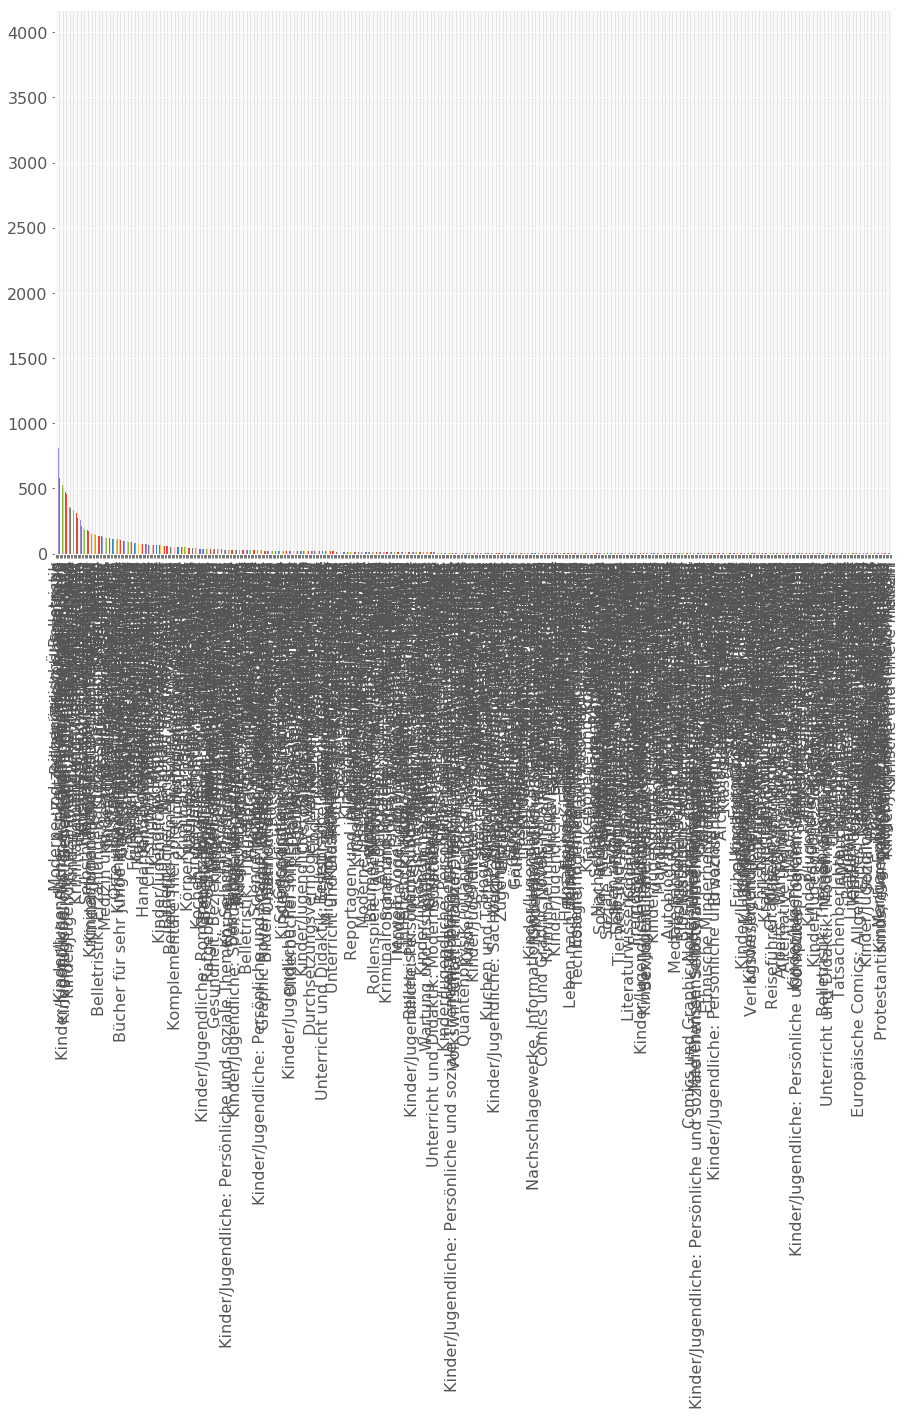

In [1184]:
# data_explore(work_df, "THEME", 10)
# Pruning data with a specific threshold for documents per theme
# work_df = data_prune(train, "THEME", 120)

# -----------------------------------------------------------------------
# Keeping/Selecting data for far/independent Theme categories:
# -----------------------------------------------------------------------
# keeping only values relating to specific "un-related" THEMES

# work_df = train_old.loc[train_old['THEME'].isin(['Kochen: Rezepte und Anleitungen','Humor','Psychothriller'])]
# work_df = train.loc[train['THEME'].isin(['Selbsthilfe und Persönlichkeitsentwicklung','Bilderbücher mit Erzähltexten','Kochen: Rezepte und Anleitungen'])]
# work_df = train.loc[train['THEME'] == 'Kochen: Rezepte und Anleitungen' | train['THEME'] == 'Humor' | train['THEME'] == 'Psychothriller']
work_df = train

# trying some plotting of data wrt THEMES
dataVisualise(work_df)
work_df.head(20)
train_text = work_df['ADDITIONALTEXT'].tolist()
train_id = work_df['MATNR'].tolist()
train_theme = work_df['THEME'].tolist()
train_schalgwort = work_df['SCHLAGWORT'].tolist()
train_title = work_df['ISMTITLE'].tolist()
# for s in train_theme:
#     s = s.decode('utf-8')
print len(train_id)
print train_id[:5]
print len(train_text)
# print train_text[:5]
# handling the unicode encoding in the data set
# for s in train_theme[:5]:
#     print s.decode('utf-8')
total_len = 0
# calculating the average text lenght in training corpus
for s in train_text:
    total_len = total_len + len(s.split())
average_text_len = total_len/len(train_text)

print "Average length of the documents in training corpus is", average_text_len

work_df.head()
work_df.tail(20)

In [1185]:
# print stop_words_caps, len(stop_words_caps)
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("german")
stop_words = stopwords.words('german')
stop_words_caps = [word.title() for word in stop_words]
stop_words.extend(stop_words_caps)
# extra missing (variations of) stop words that pop up in data
extra_stop_words = ["dass","amp", "Und", "her", "Her", "/br"]
stop_words.extend(extra_stop_words)


# Here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2:
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation) 
#     and words whose length is less than 2 characters - removes <br/a> formating from data 
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2:
            filtered_tokens.append(token)
    return filtered_tokens

def tokenize_and_stopWordsRemoval(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation) and words whose length is less than 2 characters - removes <br/a> formating from data 
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2 and token not in stop_words :
            filtered_tokens.append(token)
    return filtered_tokens


#tokenize
%time tokenized_text = [tokenize_only(text.decode('utf-8')) for text in train_text]
#remove stop words
%time texts = [[word for word in text if word not in stop_words] for text in tokenized_text]

%time texts2 = [tokenize_and_stopWordsRemoval(text.decode('utf-8')) for text in train_text]


CPU times: user 1min 24s, sys: 616 ms, total: 1min 25s
Wall time: 1min 24s
CPU times: user 37.7 s, sys: 372 ms, total: 38.1 s
Wall time: 37.4 s
CPU times: user 2min 5s, sys: 884 ms, total: 2min 6s
Wall time: 2min 4s


In [1186]:
print type(tokenized_text[0])
print type(texts[0])
print type(texts2[0])
texts_unicode = []
for i in range(len(texts)):
    texts_unicode.append(" ".join(texts[i]))
print texts_unicode[0]
print type(tokenized_text[0])
print type(texts[0])
print type(texts_unicode[0])
print texts[0]

<type 'list'>
<type 'list'>
<type 'list'>
PECUNIA Versicherungs-Ratgeber Dirk Magnutzki Sicher vorgesorgt EINFACH VERSTÄNDLICH NACHVOLLZIEHBAR versteht wirklich Vollkommen neu innovativ Deutschlands Versicherungs- Ratgeber Videobeiträgen QR- Codes besseren Verständnis hinterlegt Schnell einfach verständlich setzt Video-Buch neue Maßstäbe Endlich Buch Lesertypen ganz gleich Allesleser Nachschlager Querleser kommt Kosten. Schluss Chaos Sachen Versicherungen rät Verbraucher verunsichert Themen Vorsorge Versicherungsschutz schmücken Hass-Ecke Aktenschrank Lebens-Rentenversicherungen gut schlecht hoch gepriesene staatliche Förderung privaten Altersvorsorge Flop sinnvoll besten krankenversichern Sachversicherungen braucht eigentlich Gut Diplom-Versicherungs-Fachexperte Dirk Magnutzki Sachverständiger Versicherungswesen Gerichtsgutachter TV-Experte Sendereihe Pecunia seit Jahren Versicherungsbranche tätig unabhängiger Versicherungsmakler wurde mehrfach ausgezeichnet bester Makler NRW Deutschl

In [1187]:
texts_str = []
for i in range(len(texts_unicode)):
#     texts[i] = texts[i].encode('utf-8')
    texts_str.append(texts_unicode[i].encode('utf-8'))
print type(texts_str[0])

<type 'str'>


In [1188]:
print texts_unicode[0]
print texts_str[0]

PECUNIA Versicherungs-Ratgeber Dirk Magnutzki Sicher vorgesorgt EINFACH VERSTÄNDLICH NACHVOLLZIEHBAR versteht wirklich Vollkommen neu innovativ Deutschlands Versicherungs- Ratgeber Videobeiträgen QR- Codes besseren Verständnis hinterlegt Schnell einfach verständlich setzt Video-Buch neue Maßstäbe Endlich Buch Lesertypen ganz gleich Allesleser Nachschlager Querleser kommt Kosten. Schluss Chaos Sachen Versicherungen rät Verbraucher verunsichert Themen Vorsorge Versicherungsschutz schmücken Hass-Ecke Aktenschrank Lebens-Rentenversicherungen gut schlecht hoch gepriesene staatliche Förderung privaten Altersvorsorge Flop sinnvoll besten krankenversichern Sachversicherungen braucht eigentlich Gut Diplom-Versicherungs-Fachexperte Dirk Magnutzki Sachverständiger Versicherungswesen Gerichtsgutachter TV-Experte Sendereihe Pecunia seit Jahren Versicherungsbranche tätig unabhängiger Versicherungsmakler wurde mehrfach ausgezeichnet bester Makler NRW Deutschland. erläutert verständlichen nachvollzieh

In [971]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8 , max_features=200000,
                                 min_df=0.01 , stop_words= stop_words,
                                 use_idf=True, tokenizer=tokenize_only, ngram_range=(1,3))

# tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
#                                  min_df=0.2, stop_words= stop_words,
#                                  use_idf=True, ngram_range=(1,3))
%time tfidf_matrix = tfidf_vectorizer.fit_transform(texts_str) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 1.8 s, sys: 44 ms, total: 1.85 s
Wall time: 1.76 s
(793, 801)


In [985]:
from sklearn.cluster import KMeans

num_clusters = 5

# km = KMeans(n_clusters=num_clusters)
km = KMeans(n_clusters=num_clusters, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=3425)
%time km.fit(tfidf_matrix)
# %time km.fit(dist)

clusters = km.labels_.tolist()

terms = tfidf_vectorizer.get_feature_names()
# print type(tfidf_matrix)
# print tfidf_matrix[0]
print "total number of documents in the current corpus are %d " % (len(train_text))
# print " ".join(terms)

from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
dist = 1 - cosine_similarity(tfidf_matrix)
print Counter(train_theme)
print Counter(clusters)

CPU times: user 224 ms, sys: 0 ns, total: 224 ms
Wall time: 225 ms
total number of documents in the current corpus are 793 
Counter({'Manga: Shojo': 214, 'Kochen: Rezepte und Anleitungen': 198, 'Humor': 134, 'Psychothriller': 124, 'Medizin und Gesundheit: Ratgeber, Sachbuch': 123})
Counter({4: 325, 1: 157, 0: 147, 3: 120, 2: 44})


In [1189]:
# print dist[18]
texts_lower = [[j.lower() for j in i] for i in texts]

In [1159]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)

# %time pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
%time pos = mds.fit_transform(distance_WMD)  # shape (n_components, n_samples)

# xs, ys = pos[:, 0], pos[:, 1]
xs, ys, zs = pos[:, 0], pos[:, 1], pos[:, 2]

CPU times: user 740 ms, sys: 0 ns, total: 740 ms
Wall time: 739 ms


In [800]:
mds = MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=1,
                   dissimilarity="precomputed", n_jobs=1)
%time pos = mds.fit(distance_WMD).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=1, n_jobs=1,
                    n_init=1)
%time npos = nmds.fit_transform(distance_WMD, init=pos)
xs_nmds, ys_nmds = npos[:, 0], npos[:, 1]

CPU times: user 45min, sys: 54.1 s, total: 45min 54s
Wall time: 49 s
CPU times: user 6.07 s, sys: 8 ms, total: 6.08 s
Wall time: 411 ms


In [801]:
# Evaluating the performance on PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
%time pos_pca = pca.fit_transform(distance_WMD)
xs_pca, ys_pca = pos_pca[:, 0], pos_pca[:, 1]

CPU times: user 10min 34s, sys: 18.3 s, total: 10min 52s
Wall time: 5.82 s


In [802]:
# Evaluating the performance on LLE
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=40, n_components=2, method='modified',
                               eigen_solver='auto')
%time pos_lle = model.fit_transform(distance_WMD)
xs_lle, ys_lle = pos_lle[:, 0], pos_lle[:, 1]

CPU times: user 13min 56s, sys: 11.3 s, total: 14min 8s
Wall time: 7.39 s


In [803]:
# Evaluating the performance on ISOMAP
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=10, n_components=2)
iso.fit(distance_WMD)
%time pos_isomap = iso.transform(distance_WMD)
xs_iso, ys_iso = pos_isomap[:, 0], pos_isomap[:, 1]
# manifold_2Da = iso.transform(distance_WMD)
# manifold_2D = pd.DataFrame(manifold_2Da, columns=['x', 'y'])

# Left with 2 dimensions
manifold_2D.head()

CPU times: user 228 ms, sys: 0 ns, total: 228 ms
Wall time: 229 ms


,x,y
0,2.995503,0.872063
1,-1.342280,-2.487375
2,2.864507,-0.140041
3,-0.268728,-1.273750
4,0.014062,-0.506997


In [1160]:
# Evaluating performance on tsne
%time pos_tsne = TSNE(n_components=3, perplexity=40, verbose=2).fit_transform(distance_WMD)
# %time pos_tsne = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(dist)
xs_tsne, ys_tsne, zs_tsne = pos_tsne[:, 0], pos_tsne[:, 1], pos_tsne[:, 2]
# xs_tsne, ys_tsne = pos_tsne[:, 0], pos_tsne[:, 1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 134 samples in 0.000s...
[t-SNE] Computed neighbors for 134 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 134 / 134
[t-SNE] Mean sigma: 0.427865
[t-SNE] Computed conditional probabilities in 0.014s
[t-SNE] Iteration 50: error = 74.1461792, gradient norm = 0.2818499 (50 iterations in 0.308s)
[t-SNE] Iteration 100: error = 89.1584778, gradient norm = 0.2266296 (50 iterations in 0.275s)
[t-SNE] Iteration 150: error = 103.8668289, gradient norm = 0.1809485 (50 iterations in 0.278s)
[t-SNE] Iteration 200: error = 107.0919647, gradient norm = 0.1716413 (50 iterations in 0.272s)
[t-SNE] Iteration 250: error = 115.5284119, gradient norm = 0.1520229 (50 iterations in 0.277s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 115.528412
[t-SNE] Iteration 300: error = 2.5573039, gradient norm = 0.0003579 (50 iterations in 0.295s)
[t-SNE] Iteration 350: error = 2.2796180, gradient norm = 0.0001

In [1098]:
print type(dist), dist.shape
print type(distance_WMD), distance_WMD.shape
print type(xs), xs.shape
print type(ys), ys.shape
print type(zs), ys.shape
print type(xs_pca), xs_pca.shape
print type(ys_pca), ys_pca.shape
print type(ys_lle), ys_lle.shape
print type(xs_lle), xs_lle.shape
print type(xs_iso), xs_iso.shape
print type(ys_iso), ys_iso.shape
# print xs_tsne[:150], ys_tsne[:150]
# print xs_pca[:5], ys_pca[:5]
print type(xs_nmds), xs_nmds.shape

<type 'numpy.ndarray'> (793, 793)
<type 'numpy.ndarray'> (456, 456)
<type 'numpy.ndarray'> (456,)
<type 'numpy.ndarray'> (456,)
<type 'numpy.ndarray'> (456,)
<type 'numpy.ndarray'> (456,)
<type 'numpy.ndarray'> (456,)
<type 'numpy.ndarray'> (456,)
<type 'numpy.ndarray'> (456,)
<type 'numpy.ndarray'> (456,)
<type 'numpy.ndarray'> (456,)
<type 'numpy.ndarray'> (456,)


Counter({'Kochen: Rezepte und Anleitungen': 53, 'Humor': 41, 'Psychothriller': 40})
name of theme = Humor, code = 2, color_key = #7570b3
name of theme = Kochen: Rezepte und Anleitungen, code = 0, color_key = #1b9e77
name of theme = Psychothriller, code = 1, color_key = #d95f02


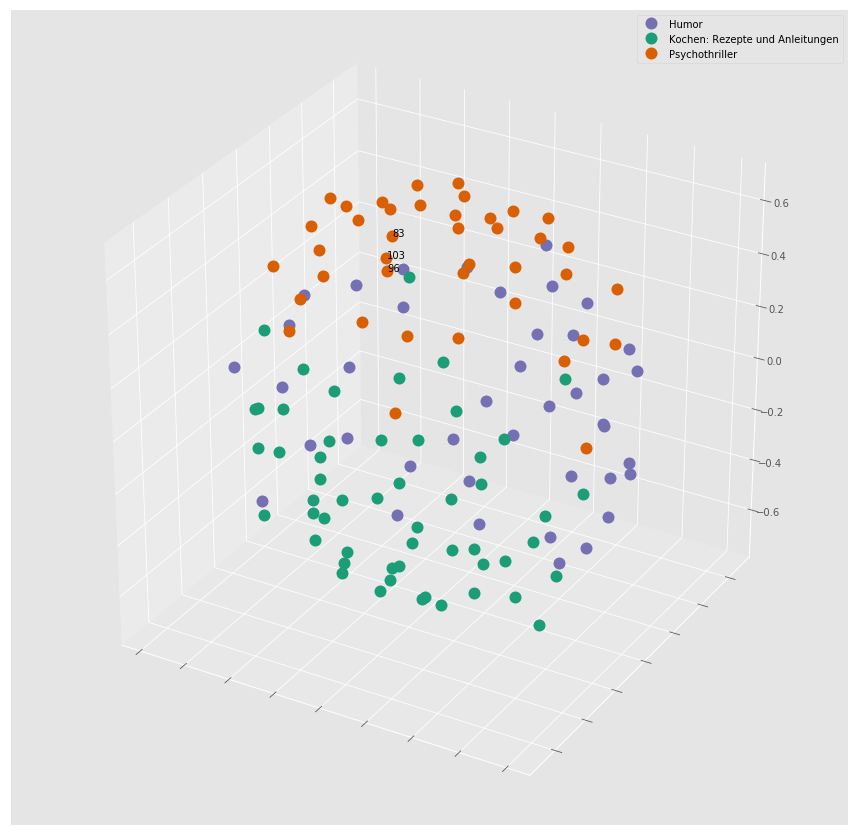

In [1174]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

# mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

"""                                                                                                                                                    
Scaling is done from here...                                                                                                                           
"""
x_scale=1
y_scale=1
z_scale=1

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0

def short_proj():
  return np.dot(Axes3D.get_proj(ax), scale)

ax.get_proj=short_proj
"""                                                                                                                                                    
to here                                                                                                                                                
"""

df = pd.DataFrame(dict(x=xs, y=ys, z=zs, theme=train_theme, ID=train_id ))
groups = df.groupby('theme')

print Counter(train_theme)

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label

for name, group in groups:
    print "name of theme = %s, code = %s, color_key = %s" % ((name).decode('utf-8'), inv_cluster_names[name], cluster_colors[inv_cluster_names[name]])
    ax.plot(group.x, group.y, group.z, marker='o', linestyle='', ms=12, 
            label=(name).decode('utf-8'), color=cluster_colors[inv_cluster_names[name]], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point
# 96  83 103 181 423 349 208 119 112 116
#add label in x,y position with the document ID as an identifier
for i in range(len(df)):
    if (i == 96) or (i == 83) or (i == 103) or (i == 181) or (i == 423):  
        ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['z'], i, size=10)  


plt.show()

Counter({'Kochen: Rezepte und Anleitungen': 53, 'Humor': 41, 'Psychothriller': 40})
name of theme = Humor, code = 2, color_key = #7570b3
name of theme = Kochen: Rezepte und Anleitungen, code = 0, color_key = #1b9e77
name of theme = Psychothriller, code = 1, color_key = #d95f02


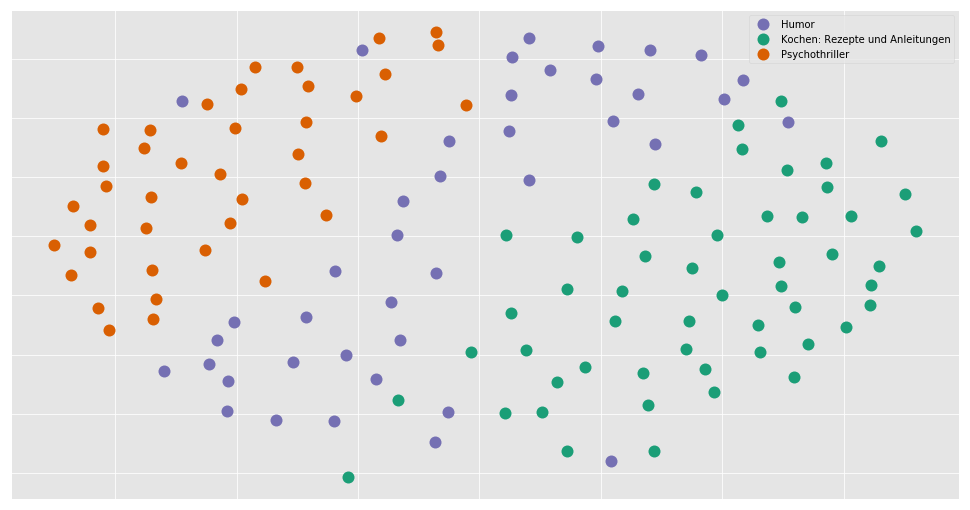

In [1158]:
# setting up plot by "clustering" x's and y's based on WMD 
#----------------------------------------------------------

#set up colors per clusters using a dict
# #800000, #FFFF00, #8B0000, #9932CC, #ADFF2F
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#800000', 6: '#FFFF00', 7: '#8B0000', 8: '#9932CC', 9: '#ADFF2F', 10: '#228B22', 11: '#00FFFF'}

#set up cluster names using a dict
cluster_names = {0: 'Kochen: Rezepte und Anleitungen', 
                 1: 'Psychothriller', 
                 2: 'Humor', 
                 3: 'HarryPotter', 
                 4: 'SherlockHolmes',
                 5: 'Selbsthilfe und Persönlichkeitsentwicklung', 
                 6: 'Kinder/Jugendliche: Action- und Abenteuergeschichten', 
                 7: 'Kinder/Jugendliche: Gegenwartsliteratur', 
                 8: 'Kinder/Jugendliche: Romane, Erzählungen, Tatsachenberichte', 
                 9: 'Manga: Shojo',
                 10: 'Medizin und Gesundheit: Ratgeber, Sachbuch',
                 11: 'Kinder, Jugendliche und Bildung'}

inv_cluster_names = {v: k for k, v in cluster_names.iteritems()}

#set up cluster names according to cluster label using a dict
cluster_numbers= {0: 'Cluster 0', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4',
                 5: 'Cluster 5', 
                 6: 'Cluster 6', 
                 7: 'Cluster 7', 
                 8: 'Cluster 8', 
                 9: 'Cluster 9',
                 10: 'Cluster 10',
                 11: 'Cluster 11'}


#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
# df = pd.DataFrame(dict(x=xs, y=ys, cluster_label=clusters_wmd, theme=train_theme[:1000]))
df = pd.DataFrame(dict(x=xs, y=ys, theme=train_theme, ID=train_id ))
# df = pd.DataFrame(dict(x=gt_xs_mds, y=gt_ys_mds, theme=gt_themes, ID=gt_id ))
# df.sort_values('theme')
#group by cluster
# groups = df.groupby('cluster_label')
groups = df.groupby('theme')

# groups.head(100)
df.head(500)
# print df.ix[i]['index']

print Counter(train_theme)
# print Counter(gt_themes)

# for name, group in groups:
#     print "name is--> %s" % name
#     print "theme values are %s" % (group.theme).astype(basestring)
#     print "group values are x = %s, y = %s" %((group.x).astype(basestring), (group.y).astype(basestring)) 

# for row in df.iterrows():
#     print row[1][1]

# for row in df.itertuples():
#     print getattr(row, "x"), getattr(row, "y"), getattr(row, 'theme')
#     print type(getattr(row, 'theme'))

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label

for name, group in groups:
    print "name of theme = %s, code = %s, color_key = %s" % ((name).decode('utf-8'), inv_cluster_names[name], cluster_colors[inv_cluster_names[name]])
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=(name).decode('utf-8'), color=cluster_colors[inv_cluster_names[name]], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the document ID as an identifier
# for i in range(len(df)):
#     ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['ID'], size=10)  
#     if (i == 50) or (i == 57) or (i == 28) or (i == 30) or (i == 88):  
#         ax.text(df.iloc[i]['x'], df.iloc[i]['y'], i, size=10)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)


In [988]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
# df = pd.DataFrame(dict(cluster_label=clusters_wmd_kmeans, theme=train_theme)) 

d=df.groupby(['cluster_label', 'theme']).theme.count()
d = d.groupby(level=0).apply(lambda x: x.sort_values(ascending=False))
print "distribution of documents across Theme are %s " % Counter(train_theme)
print "distribution of documents across clusters are %s " % Counter(clusters)
# d = d.sort_values(ascending=False).sort_index(level='theme', sort_remaining=False)
d.head(100)

distribution of documents across Theme are Counter({'Manga: Shojo': 214, 'Kochen: Rezepte und Anleitungen': 198, 'Humor': 134, 'Psychothriller': 124, 'Medizin und Gesundheit: Ratgeber, Sachbuch': 123}) 
distribution of documents across clusters are Counter({4: 325, 1: 157, 0: 147, 3: 120, 2: 44}) 


cluster_label  cluster_label  theme                                     
0              0              Manga: Shojo                                  114
                              Psychothriller                                 70
                              Humor                                          15
                              Kochen: Rezepte und Anleitungen                 5
                              Medizin und Gesundheit: Ratgeber, Sachbuch      2
1              1              Kochen: Rezepte und Anleitungen               155
                              Medizin und Gesundheit: Ratgeber, Sachbuch      6
                              Humor                                           1
2              2              Humor                                          15
                              Psychothriller                                 12
                              Kochen: Rezepte und Anleitungen                 5
                              Medizin und Gesun

Counter({4: 325, 1: 157, 0: 147, 3: 120, 2: 44})


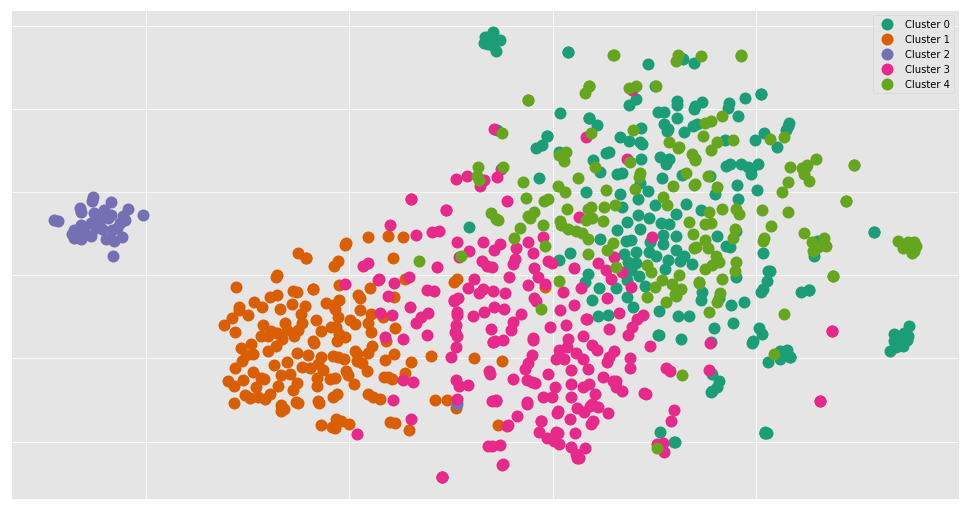

In [986]:
# setting up plot by "cluster labels" now based on WMD 

groups = df.groupby('cluster_label')

print Counter(clusters)
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_numbers[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')


    
ax.legend(numpoints=1)  #show legend with only 1 point

# #add label in x,y position with the label as the film title
# for i in range(len(df)):
#     ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['cluster_label'], size=8)  

    
    
plt.show() #show the plot


In [1093]:
# getting list of Themes with only a single documents aka long tail
# themeListLongTail = listOfAttributeValues(work_df, "THEME", 1)
# print len(themeListLongTail)
# print train.index[train['THEME'] == "für Frauen und/oder Mädchen"].tolist()
# print train.iloc[train['THEME'] == "für Frauen und/oder Mädchen"].tolist()
# work_df.describe
# print work_df.iloc()[0]['THEME']

# for i in range(0,6777):
#     if work_df.iloc[i]['THEME'] == "Kochen: Hauptgerichte":
#          print i,work_df.iloc[i]['THEME']

# A1026834633 A1030955899
# for i in range(0,work_df.shape[0]):
#     if work_df.iloc[i]['MATNR'] == "A1017844040" or work_df.iloc[i]['MATNR'] == "A1030312657":
#          print i,train.iloc[i]['THEME'], train_title[i]

print train.iloc[9326]['ADDITIONALTEXT'] + "\n"
print train.iloc[17132]['ADDITIONALTEXT'] + "\n"
print train.iloc[17441]['ADDITIONALTEXT'] + "\n"

print (" ").join(texts[9326])+ "\n"
print (" ").join(texts[17132])+ "\n"
print (" ").join(texts[17441])+ "\n"

Millionen junge Leser hat Karl May in die Welt der Rothäute und Bleichgesichter entführt. Gebannt folgen sie seit Generationen den spannenden Geschichten von Old Shatterhand und dem edlen Apachen Winnetou. Zwischen Silberbüchse und Henrystutzen, Marterpfahl und Friedenspfeife entfaltet Karl May drei Winnetou-Bände hindurch ein gewaltiges Wildwest-Panorama. Es steckt voller Abenteuer, übler Schurken und liebenswerter Gefährten von Sam Hawkens bis Nscho-tschi.

Karl Mays bekannteste Abenteuergeschichte über die Blutsbrüderschaft von Old Shatterhand und Apachenhäuptling Winnetou. Seit 1956 hat sich keine Rundfunkanstalt mehr an diesen berühmten Stoff gewagt. 2010 brachte Hans Helge Ott die Neubearbeitung von Regine Ahrem zusammen mit den Musikfestspielen Potsdam zunächst als Live-Hörspiel auf die Bühne, hier kommt endlich die Studiofassung, die alles mitbringt, was ein Hörspielklassiker braucht: eine großartige Schauspielerriege, ein grandioses Orchester, Abenteuer, Romantik und echte Hel

In [1235]:
# for i in range(0,work_df.shape[0]):
#     if train_title[i] == "Dracula" or train_title[i] == "Winnetou" or train_title[i] == "Die Räuber":
#          print i,train.iloc[i]['THEME'], train_title[i]
# for i in range(0,train.shape[0]):
#     if "Dracula" in train_title[i] or "Winnetou" in train_title[i] or "Lola" in train_title[i] or "BLACKOUT" in train_title[i]:
#          print i," ", train.iloc[i]['THEME'], " ", train_title[i]
for i in range(0,train.shape[0]):
    if "Liliane Susewind11" in train_title[i] or "Die Tribute von Panem" in train_title[i]:
         print i," ", train.iloc[i]['THEME'], " ", train_title[i]

3824   Belletristik in Übersetzung   Die Tribute von Panem 3. Flammender Zorn (2 MP3 CDs)
3825   Belletristik in Übersetzung   Die Tribute von Panem 1-3 Gesamtausgabe (6 MP3 CDs)
4601   Kinder, Jugendliche und Bildung   Die Tribute von Panem - 3 Bände im Schuber
10358   Kinder/Jugendliche: Romane, Erzählungen, Tatsachenberichte   Die Tribute von Panem 2. Gefährliche Liebe
10702   Belletristik in Übersetzung   Die Tribute von Panem - 3 Bände im Schuber
19749   Kinder/Jugendliche: Romane, Erzählungen, Tatsachenberichte   Die Tribute von Panem 1. Tödliche Spiele
26006   Kinder/Jugendliche: Romane, Erzählungen, Tatsachenberichte   Die Tribute von Panem 3 - Flammender Zorn


In [ ]:
# Testing WMD results for this model03 embeddings
# RESULTS - very poor contextual similarity results on model03, reason probably a lot of OOV.
# continue working with better models - model_wiki_de, model02 and model

# Initialize WmdSimilarity.
from gensim.similarities import WmdSimilarity
num_best = 10
# instance = WmdSimilarity(texts, model02, num_best=10)
instance = WmdSimilarity(texts_lower, model_wiki_de, num_best=10)
start = time()
# sims = instance[texts[10284]]
sims = instance[texts_lower[3465]]  # A query is simply a "look-up" in the similarity class.
print 'Cell took %.2f seconds to run.' %(time() - start)

In [1081]:
# Print the query and the retrieved documents, together with their similarities.
print 'Query:'
print work_df.iloc()[10284]['ADDITIONALTEXT']
# print " ".join(texts[5534])
# print type(sims)
for i in range(10):
    print
    print 'sim = %.4f' % sims[i][1]
    print sims[i][0]
    print "MATNR is %s" % work_df.iloc()[sims[i][0]]['MATNR']
    print "Theme is %s" % work_df.iloc()[sims[i][0]]['THEME']
    print "Title is %s" % work_df.iloc()[sims[i][0]]['ISMTITLE']
    print work_df.iloc()[sims[i][0]]['ADDITIONALTEXT']
#     print (" ").join(texts[sims[i][0]])

Query:
Die Gestalt des Grafen Dracula ist eine der bekanntesten literarischen Figuren der Welt. Seit im Jahr 1897 der Vampirroman 'Dracula' des irischen Unterhaltungsschriftstellers Bram Stoker erschien, ist sie aus Literatur und Film kaum mehr wegzudenken. Besonders das Kino hat die Vampire schnell bildgewaltig für sich entdeckt &amp;#8211; den genreeigenen Qualitäten des literarischen Originals hat dies jedoch keinen Abbruch getan. Bis heute ist Stokers Roman über den jungen Anwalt Harker und den dämonischen Untoten Dracula ein schaurig-schönes Leseerlebnis.

sim = 1.0000
10284
MATNR is A1001559375
Theme is Abenteuerromane
Title is Dracula
Die Gestalt des Grafen Dracula ist eine der bekanntesten literarischen Figuren der Welt. Seit im Jahr 1897 der Vampirroman 'Dracula' des irischen Unterhaltungsschriftstellers Bram Stoker erschien, ist sie aus Literatur und Film kaum mehr wegzudenken. Besonders das Kino hat die Vampire schnell bildgewaltig für sich entdeckt &amp;#8211; den genreeige

In [1236]:
# checking location of other related book titels in the relevant distance matrix
# sorted_distances.index("10611")
sorted_distances = np.argsort(distance_WMD_lotta)
print "%s, Location in distance list %s" % ( train_title[10611], sorted_distances.tolist().index(10611))
print "%s, Location in distance list %s" % ( train_title[10612], sorted_distances.tolist().index(10612))
print "%s, Location in distance list %s" % ( train_title[25607], sorted_distances.tolist().index(25607))
print
print work_df.iloc()[10611]['ADDITIONALTEXT']
print
print work_df.iloc()[10612]['ADDITIONALTEXT']
print
print work_df.iloc()[25607]['ADDITIONALTEXT']

Die Wilden Küken - Auf der Alm, Location in distance list 2624
Die Wilden Küken, Location in distance list 800
Die Wilden Küken - Auf Schatzsuche, Location in distance list 4191

Für alle coolen Mädels: Die Abenteuer der Wilden Küken gehen weiter! Zum Inhalt: Kühe melken ist ein Klacks. Von wegen! Wie schwer das ist, merken die Wilden Küken und die Grottenolme schnell, als sie den Sommer auf der Alm verbringen. Aber natürlich sind die milchverweigernden Tiere nicht die einzige Herausforderung, die in den Bergen auf die beiden Banden warten: Jede Menge Liebeleien, Eifersucht und witzige Streiche sind ebenfalls dabei!

Frisch geschlüpft. kükencoole Bandenabenteuer   Lilly, Bob und Very sind die &amp;#8222;Wilden Küken&amp;#8220;. Doch was ist eine Bande ohne Bandenquartier und echte Abenteuer? Ole, Little und Mitch machen sich schon lustig über die drei. Wie gut, dass Sprotte und die anderen &amp;#8222;Wilden Hühner&amp;#8220; ihnen eine alte Schatztruhe schenken. Doch die Küken haben ka

In [1217]:
# distance_WMD_9651 = np.zeros((len(texts)))
# for i in range(len(texts)):
#         distance_WMD_9651[i] = model_wiki_de.wmdistance(texts_lower[9651], texts_lower[i])
# #     distance_WMD_9651_model02[i] = model02.wmdistance(texts[9651], texts[i])
# print 'Cell took %.2f seconds to run.' %(time() - start)

In [1216]:
# np.argsort() prints the array indices in ascending order which can be used to list of n nearest neighbors in the dist matrix
# print np.argsort(distance_WMD_dracula)
# sorted_distances = np.argsort(distance_WMD_dracula)
sorted_distances = np.argsort(distance_WMD_9651)

for i in range(0, 21):
    print "MATNR is %s" % work_df.iloc()[sorted_distances[i]]['MATNR']
    print "Theme is %s" % work_df.iloc()[sorted_distances[i]]['THEME']
    print "Title is %s" % work_df.iloc()[sorted_distances[i]]['ISMTITLE']
    print work_df.iloc()[sorted_distances[i]]['ADDITIONALTEXT']
    print

MATNR is A1027129827
Theme is Kinder/Jugendliche: Liebesromane, Freundschaftsromane
Title is Liliane Susewind - Ein Panda ist kein Känguru
<p>Neues Zuhause für Panda-Baby dringend gesucht!</p><p>Im Tierpark der Nachbarstadt wurde ein Panda-Baby von seiner Mutter verstoßen.<br>Gut, dass Lilli mit Tieren sprechen kann! So versteht sie sofort, dass der kleine Bär ohne Ersatzmama nicht überleben wird. Kurzerhand entführt sie ihn, um zusammen mit den Tieren im Zoo ihrer Stadt eine Lösung zu suchen. Glücklicherweise nimmt die einsame Kängurudame Kylie das Bärenkind in ihren<br>Beutel auf. Es ist Mutterliebe auf den ersten Blick! Doch das Adoptionsglück wird bald getrübt: Wenn Kylie durch ihr Gehege hüpft, wird dem Panda im Beutel schlecht ... Was kann Lilli nur tun?</p><p>Der neue Band der beliebten Bestseller-Reihe, der kleine Tierfreunde-Herzen höher schlagen lässt.</p>

MATNR is A1009311858
Theme is Kinder/Jugendliche: Natur- und Tiergeschichten
Title is Liliane Susewind - Mit Elefanten s

In [791]:
# computing pairwise distance matrix for the given corpus using WMD
distance_WMD = np.zeros((len(texts),len(texts)))
%timeit
# distance_WMD = np.zeros((1000,1000))
print len(texts)
print distance_WMD.shape

start = time()
for i in range(len(texts_lower)):
    for j in range(len(texts_lower)):
        if distance_WMD[i,j] == 0 and i != j:
            distance_WMD[i,j] = model_wiki_de.wmdistance(texts_lower[i], texts_lower[j])
            distance_WMD[j,i] = distance_WMD[i,j]
print 'Cell took %.2f seconds to run.' %(time() - start)

In [789]:
print distance_WMD[100]

[ 1.1101825   1.20701631  1.09355598  1.07453312  1.08836459  1.13313381
  1.10759692  1.0893155   1.13942572  1.11843913  1.1140805   1.09810822
  1.14786475  1.12319599  1.1363212   1.18401247  1.20097251  1.07770953
  1.10497272  1.11257191  1.09338544  1.1694485   1.1012432   1.06616705
  1.11924205  1.14829948  1.17257893  1.11834729  1.09793368  1.11144196
  1.13006193  1.1032626   1.1062298   1.10058565  1.12000683  1.11256367
  1.10591753  1.08829118  1.11946624  1.06888823  1.09563721  1.08061771
  1.13362182  1.09322703  1.09227802  1.0915725   1.13207045  1.09750606
  1.1122909   1.09208864  1.15307178  1.13770878  1.10618817  1.1024499
  1.08727148  1.09424917  1.09542995  1.07785811  1.11203766  1.09789069
  1.1313965   1.18234845  1.129369    1.12263611  1.12513083  1.08820578
  1.13122564  1.11940431  1.09587494  1.1253665   1.13614612  1.11507465
  1.0918955   1.13325761  1.07931563  1.13098497  1.13582675  1.1329173
  1.13360826  1.09841754  1.10031828  0.56416625  1.1

In [1155]:
from sklearn.externals import joblib

#since I've already run my model I am loading from the pickle

# joblib.dump(distance_WMD,  'doc456_distance_WMD_model_wiki.pkl')
# joblib.dump(sc,  'doc1000_cluster.pkl')

distance_WMD = joblib.load('doc134_distance_WMD_model01.pkl')

In [795]:
print distance_WMD.shape
from sklearn.cluster import SpectralClustering
from sklearn import metrics

# Cluster
sc = SpectralClustering(3, affinity='precomputed', n_init=100)
sc.fit(distance_WMD)
# sc.fit(dist)
clusters_wmd = sc.labels_.tolist()
print Counter(clusters_wmd)
print Counter(train_theme)
print len(clusters_wmd)

(456, 456)
Counter({0: 454, 1: 1, 2: 1})
Counter({'Kochen: Rezepte und Anleitungen': 198, 'Humor': 134, 'Psychothriller': 124})
456


In [839]:
# Testing the performance on DBSCAN
from sklearn.cluster import DBSCAN
# Compute DBSCAN
db = DBSCAN(eps= 1, min_samples = 10).fit(distance_WMD)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(distance_WMD, labels))
print db.labels_

Estimated number of clusters: 0
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -

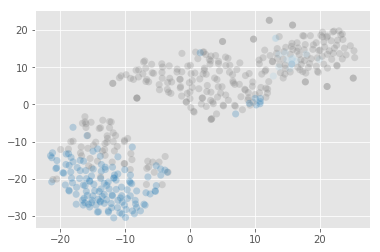

In [855]:
# Trying HDBSCAN as it also has methods for hierarchial clustring
import hdbscan
import seaborn as sns
# clusterer = hdbscan.HDBSCAN(metric='precomputed')
clustrer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40, metric='precomputed', min_cluster_size=50, min_samples=50, p=None)
clusterer.fit(distance_WMD)
clusterer.labels_
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(xs_tsne, ys_tsne, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

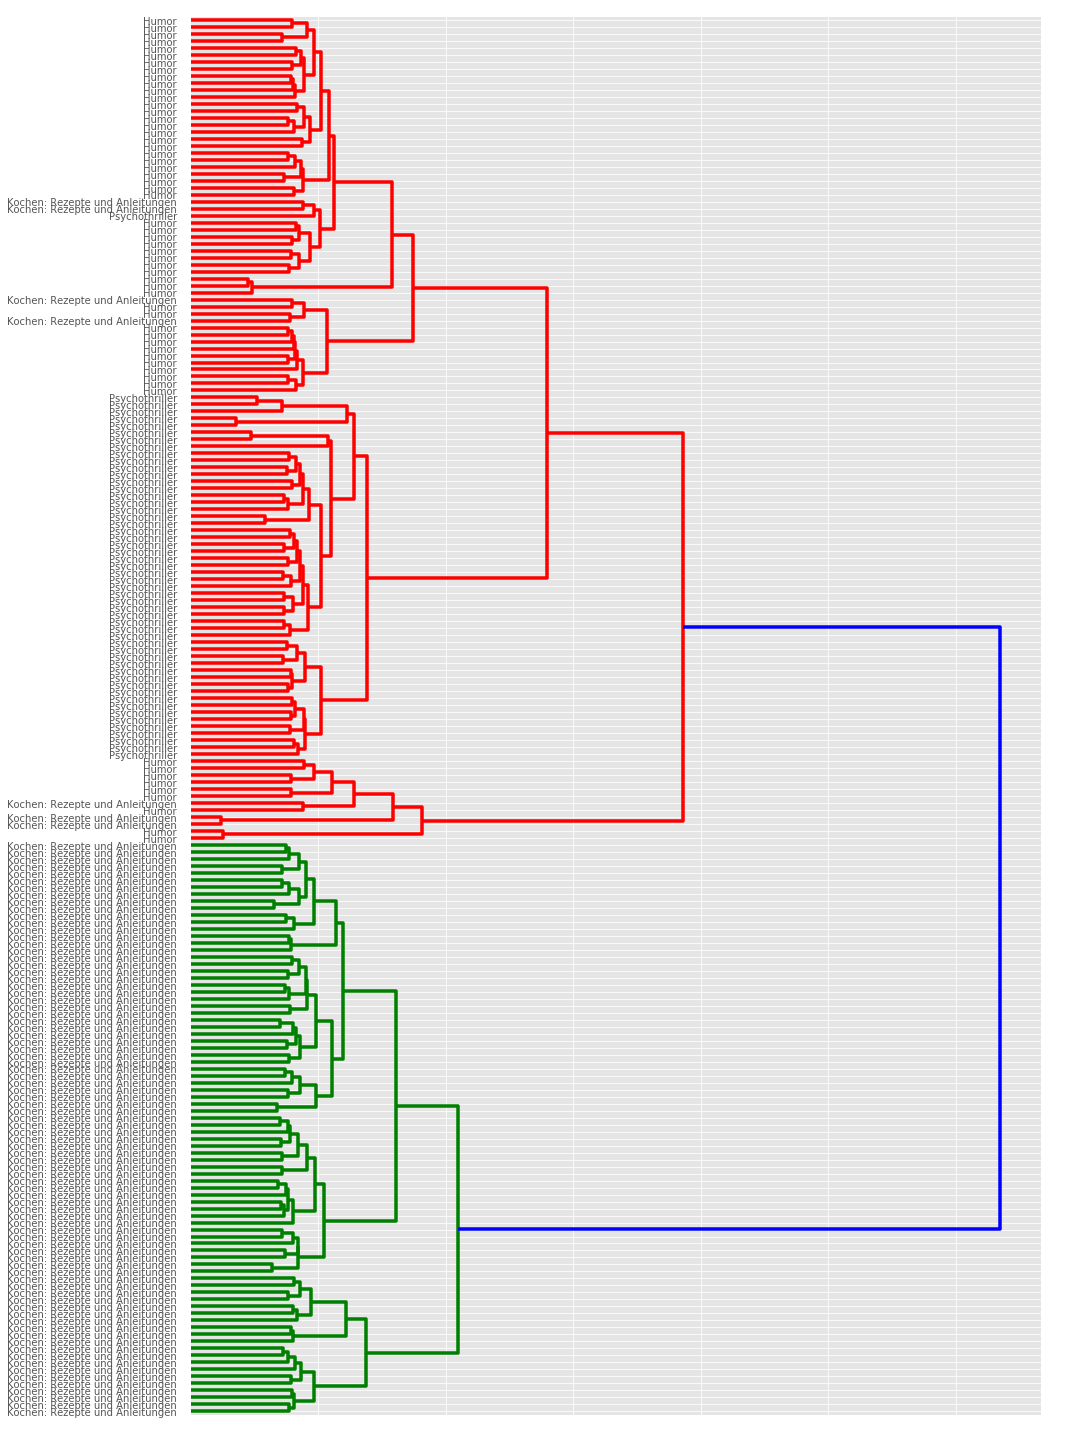

In [874]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

doc_id = []
for i in range(0, 457):
    doc_id.append(i)
    
def dendogram(similarity_matrix, book_names):
    linkage_matrix = ward(similarity_matrix) # Define the linkage_matrix using ward clustering pre-computed distances
    mpl.rcParams['lines.linewidth'] = 3.5

    fig, ax = plt.subplots(figsize=(15, 20)) # Set size
    ax = dendrogram(linkage_matrix, orientation="right", labels=book_names);

    plt.tick_params(\
        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off',
        length = 25)
    plt.tick_params(\
        axis= 'y',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off',
        labelsize = 10)
    plt.tick_params(width=50, length = 10)
    plt.tight_layout() # Show plot with tight layout

# dendogram(cosine_similarity(distance_WMD[:100]), doc_id[:100])
dendogram((distance_WMD[:200]), train_theme[:200])

# dendogram(gt_distance_WMD, gt_themes)

In [837]:
# Trying to see KMeans clustering on distance matrix and evaluating the cluster contents
num_clusters = 3

km = KMeans(n_clusters=num_clusters)

%time km.fit(distance_WMD)

clusters_wmd_kmeans = km.labels_.tolist()

Counter(clusters_wmd_kmeans)

CPU times: user 5.8 s, sys: 36 ms, total: 5.84 s
Wall time: 147 ms


Counter({0: 59, 1: 182, 2: 215})

In [838]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(cluster_label=clusters_wmd_kmeans, theme=train_theme)) 

d=df.groupby(['cluster_label', 'theme']).theme.count()
d = d.groupby(level=0).apply(lambda x: x.sort_values(ascending=False))
print "distribution of documents across Theme are %s " % Counter(train_theme)
print "distribution of documents across clusters are %s " % Counter(clusters_wmd_kmeans)
# d = d.sort_values(ascending=False).sort_index(level='theme', sort_remaining=False)
d.head(100)

distribution of documents across Theme are Counter({'Kochen: Rezepte und Anleitungen': 198, 'Humor': 134, 'Psychothriller': 124}) 
distribution of documents across clusters are Counter({2: 215, 1: 182, 0: 59}) 


cluster_label  cluster_label  theme                          
0              0              Humor                               38
                              Kochen: Rezepte und Anleitungen     17
                              Psychothriller                       4
1              1              Kochen: Rezepte und Anleitungen    180
                              Humor                                2
2              2              Psychothriller                     120
                              Humor                               94
                              Kochen: Rezepte und Anleitungen      1
Name: theme, dtype: int64

In [377]:
# model.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.
# print 'Cell took %.2f seconds to run.' %(time() - start)
def wmd_dist_sim(doc1_index, doc2_index):
    distance = model.wmdistance(texts[doc1_index], texts[doc2_index])
    print 'distance = %.6f sim = %.6f between documents %d, %d' % (distance, (1.0/ (1.0 + distance)), doc1_index, doc2_index)

# # Normalizing word vectors do improve "intutitive results". 
# # Documents which are similar are infact in close neighborhood.
# from time import time
# # Normalizing word2vec vectors.
# start = time()


# distance = model.wmdistance(texts[36], texts[94])
# print 'distance = %.4f sim = %.4f between documents %d, %d' % (distance, (1.0/ (1.0 + distance)), 36, 94)

# Observation : WMD distances are calculated as expectde in the dist_matrix and sim is calcualted via
# above formula, but the projections on 2D plane are a bit mis matched and deceptive. What looks close on
# 2D plot might not be actually so close or far away.

In [817]:
print model_wiki_de.wmdistance(texts_lower[10], texts_lower[81])

2018-07-04 12:44:27,583 : INFO : Removed 3 and 4 OOV words from document 1 and 2 (respectively).
2018-07-04 12:44:27,587 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-07-04 12:44:27,589 : INFO : built Dictionary(75 unique tokens: [u'naschkatzen', u'n\xfctzlichsten', u'leute', u'art', u'stehen']...) from 2 documents (total 80 corpus positions)


4.92754470534


In [797]:
model_wiki_de.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.
print model_wiki_de.wmdistance(texts_lower[10], texts_lower[81])

2018-07-04 10:45:53,196 : INFO : precomputing L2-norms of word weight vectors
2018-07-04 10:46:24,108 : INFO : Removed 3 and 4 OOV words from document 1 and 2 (respectively).
2018-07-04 10:46:24,109 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-07-04 10:46:24,111 : INFO : built Dictionary(75 unique tokens: [u'naschkatzen', u'n\xfctzlichsten', u'leute', u'art', u'stehen']...) from 2 documents (total 80 corpus positions)


1.15012854206


In [1151]:
# (dist[0]).shape
# test_list = [0, 100, 1, 250, 3, 30]
# print np.argsort(test_list)

# np.argsort() prints the array indices in ascending order which can be used to list of n nearest neighbors in the dist matrix
print np.argsort(dist[96])
print np.argsort(distance_WMD[96])

# print train_text[0]
# print train_text[62]

[ 96 114 103 756 284  28 287  12 456 419 637 597 671 436 594 278 717 732
 365 311 550 353 452 272 676 479 530 466 669 228 467 171 410 295 262 514
  23 780  97 439 680 774 117 393 414 599  19 504 411 231  18 196 648   2
 291 259 267 433 653 357 368  70 200 766 746 266 370 142  67 327  29 339
 587 347 118 459 498  37 384 394 121 539 523   5  74 374  44 722 343  49
 415 361 473 428 302 134 285 633 174 130 572 100 457  98 469 675 308 618
 271 106  22 752 696 212 569 207 639  78 683 663 144 437 770 160  16  81
 446 582 186 183 706 256 250 678 681 294  59 647 373 389 785 526 488   8
 184 734 293 542 767 301 543  15 584 688 629 444 730 487 440 581 507 248
 432 603 516 382 729 173 448 119  17 363 579 673  58 692 263 356 136 292
 741   1 116 689 298 548  69 148 418 710 580 427 699 600 554  56  90 270
 638 349 552 168 345 519  33 392 788 558 435 319 269 666 145 264 662 424
 239 749   7 403 560  38 601 620 274 536 240 224 354 773 533 508 611 222
 738 124 782 216 217 159  35 320 243 576  89 286 61

In [690]:
# ============ GroundTruth data creation=======================
# =============================================================

gt_train_text = []
# adding doc from existing corups, shows how WMD can  
# FINDING Duplicates + Central female character in retrieved documents
# Themes: Psychothriller, Humor, Kochen 134 docs corpus
for i in [0, 116, 89, 65, 53, 119, 112, 103, 83, 96]:
    gt_train_text.append(train_text[i])

# Adding Harry potter series book descriptions - 
gt_train_text.append("Harry Potter und der Stein der Weisen Als mysteriöse Briefe vor seiner Haustür ankommen, hat Harry Potter noch nie von der Hogwarts-Schule für Hexerei und Zauberei gehört. Sie werden schnell von seiner Tante und seinem Onkel konfisziert. Dann, an Harrys elften Geburtstag, kommt ein merkwürdiger Mann mit wichtigen Nachrichten herein: Harry Potter ist ein Zauberer und hat einen Platz bekommen, um in Hogwarts zu studieren. Und so soll das erste der Harry Potter-Abenteuer beginnen.")
gt_train_text.append("Harry Potter und die Kammer des Schreckens In den Sommerferien nach seinem ersten Jahr an der Hogwarts-Schule für Hexerei und Zauberei hat Harry Potter unheimliche Warnungen von einer Hauselfe namens Dobby erhalten. Jetzt, in der Schule, um sein zweites Jahr zu beginnen, hört Harry unverständliches Flüstern, das durch die Korridore hallt. In kurzer Zeit beginnen die Anschläge: Schüler werden gefunden, als wären sie zu Stein geworden. Dobbys Vorhersagen scheinen sich zu erfüllen.")
gt_train_text.append("Harry Potter und der Gefangene von Askaban Für Harry Potter ist es der Beginn eines weiteren ungewöhnlichen Jahres in Hogwarts, als der Knight Bus durch die Dunkelheit stürzt und vor ihm abrupt stehen bleibt. Es stellt sich heraus, dass Sirius Black, Massenmörder und Anhänger von Lord Voldemort, entkommen ist - und sie sagen, dass er nach Harry kommt. Professor Trelawney sieht in Harrys Teeblättern in seinem ersten Divinationsunterricht ein Todeszeichen. Und vielleicht am beängstigendsten sind die Dementoren, die auf dem Schulgelände mit ihrem Kuss auf der Seele patroullieren - auf der Suche nach neuen Opfern.")
gt_train_text.append("Harry Potter und der Feuerkelch Die Regeln des Trimagischen Turniers, das in Hogwarts stattfinden wird, erlauben nur Zauberern über siebzehn Jahren, einzutreten. Also kann Harry nur davon träumen, zu gewinnen. Dann, zu seiner Überraschung, am Halloween, wenn der Feuerkelch seine Auswahl trifft, wird sein Name aus dem magischen Kelch herausgesucht. Harry wird sich lebensgefährlichen Aufgaben stellen, Drachen und Dunklen Zauberern. Er wird sich auf die Hilfe seiner Freunde verlassen müssen, wenn er den Wettbewerb lebend durchstehen will.")
gt_train_text.append("Harry Potter und der Orden des Phönix Nach dem Angriff der Dementoren auf seinen Cousin Dudley weiß Harry, dass er bald Voldemorts nächstes Ziel werden wird. Obwohl viele die Rückkehr des Dunklen Lords bestreiten, ist Harry nicht allein und eine geheime Ordnung sammelt sich am Grimmauld Platz, um gegen die Dunklen Mächte zu kämpfen. Unterdessen werden Voldemorts wilde Angriffe auf Harrys Gedanken jeden Tag stärker. Er muss Professor Snape erlauben, ihm beizubringen, sich zu schützen, bevor ihm die Zeit davonläuft.")
gt_train_text.append("Harry Potter und der Halbblutprinz In einer Sommernacht, als Dumbledore im Ligusterweg ankommt, um Harry Potter einzusammeln, ist seine Zauberstabhand geschwärzt und schrumpelig, aber er wird nicht verraten, warum. Gerüchte und Misstrauen verbreiten sich in der Zaubererwelt - es fühlt sich an, als ob sogar Hogwarts selbst in Gefahr wäre. Harry ist überzeugt, dass Malfoy das Dunkle Mal trägt: Kann es einen Todesser unter ihnen geben? Er wird mächtige Magie und wahre Freunde brauchen, denn mit Hilfe von Dumbledore untersucht er Voldemorts dunkelste Geheimnisse.")
gt_train_text.append("Harry Potter und die Heiligtümer des Todes Harry Potter verlässt den Ligusterweg zum letzten Mal. Aber als er in den Beiwagen von Hagrids Motorrad steigt und in den Himmel steigt, weiß er, dass Lord Voldemort und die Todesser nicht weit dahinter sein werden. Der Schutzzauber, der ihn bis jetzt gerettet hat, ist gebrochen. Aber der Dunkle Lord atmet Angst in alles, was er liebt. Und er weiß, dass er sich nicht verstecken kann. Um Voldemort zu stoppen, weiß Harry, dass er die verbleibenden Horkruxe finden und zerstören muss. Er wird sich seinem Gegner in einem letzten Kampf stellen müssen.")
gt_train_text.append("Fantastische Bestien & wo sie zu finden sind Hogwarts Bibliothek Buch Ein anerkanntes Lehrbuch an der Hogwarts Schule für Hexerei und Zauberei seit der Veröffentlichung, Newt Scamanders Meisterwerk hat Zaubererfamilien über Generationen hinweg unterhalten. Phantastische Bestien und Orte, an denen sie zu finden sind, ist eine unverzichtbare Einführung in die magischen Bestien der Zaubererwelt. Scamanders Jahre des Reisens und der Forschung haben einen Band von beispielloser Bedeutung geschaffen. Einige der Tiere werden den Lesern der Harry-Potter-Bücher bekannt sein - der Hippogreif, der Basilisk, der Ungarische Hornschwanz ... Andere werden selbst den leidenschaftlichsten Amateurmagiziologen überraschen. Tauchen Sie ein, um die seltsamen Gewohnheiten von magischen Bestien auf fünf Kontinenten zu entdecken.")
gt_train_text.append("Quidditch im Wandel der Zeiten Ein ewiger Bestseller in der Zaubererwelt und eines der beliebtesten Bücher in der Hogwarts-Schulbibliothek. Quidditch Through the Ages enthält alles, was Sie jemals über die Geschichte, die Regeln - und das Brechen der Regeln - des edlen Sports wissen müssen von Quidditch. Vollgepackt mit faszinierenden Fakten, zeigt dieser maßgebliche Guide des angesehenen Quidditch-Autors Kennilworthy Whisp die Geschichte des Spiels von seinen frühen Ursprüngen im mittelalterlichen Nebel auf Queerditch Marsh bis hin zum modernen Sport, den so viele Zauberer- und Muggelfamilien auf der ganzen Welt lieben. Mit der umfassenden Berichterstattung über berühmte Quidditch-Teams, die häufigsten Fouls, die Entwicklung von Rennbesen")
# Addding LOTR whole series summary -
gt_train_text.append("Ein Ring, um sie alle zu beherrschen, Ein Ring, um sie zu finden, Ein Ring, um sie alle zu bringen und in der Dunkelheit zu binden In alten Zeiten wurden die Ringe der Macht von den Elfenschmieden hergestellt, und Sauron, der Dunkle Lord, schmiedete den Einen Ring und füllte ihn mit seiner eigenen Macht, so dass er alle anderen beherrschen konnte. Aber der Eine Ring wurde von ihm genommen, und obwohl er es überall in Mittelerde suchte, blieb es für ihn verloren. Nach vielen Jahrhunderten fiel es zufällig in die Hände des Hobbit Bilbo Beutlin. Von Saurons Echtheit im Dunklen Turm von Mordor aus verbreitete sich seine Macht weit und breit. Sauron sammelte alle Großen Ringe für ihn, aber immer suchte er nach dem Einen Ring, der seine Herrschaft vervollständigen würde. Als Bilbo seinen einundsiebzigsten Geburtstag erreichte, verschwand er und hinterließ seinem jungen Cousin Frodo den Herrschenden Ring und eine gefährliche Aufgabe: über Mittelerde, tief in den Schatten des Dunklen Lords zu reisen und den Ring zu zerstören, indem er ihn in die Wüste warf Risse des Schicksals. Der Herr der Ringe erzählt von der großen Suche von Frodo und der Gemeinschaft des Ringes: Gandalf der Zauberer; die Hobbits Merry, Pippin und Sam; Gimli der Zwerg; Legolas der Elf; Boromir von Gondor; und ein großer, geheimnisvoller Fremder namens Strider.")

# Adding Sherlock Holmes book descriptions -
gt_train_text.append("Die Sherlock Holmes Serie von Arthur Conan Doyle Seit Doyle den unsterblichen Sherlock Holmes und seinen Assistenten Dr. Watson geschaffen hat, ist ihm kein anderer Mystery-Autor nahe gekommen, ihn als Standardträger in der Kriminalliteratur zu übertrumpfen. Ein brillanter Londoner beratender Detektiv, Holmes ist berühmt für seine intellektuelle Tapferkeit und bekannt für seinen geschickten Einsatz von kluger Beobachtung, deduktivem Denken und Schlussfolgerung, um schwierige Fälle zu lösen. Sherlock Holmes ist der einzige beratende Detektiv der Welt. Geld und Prestige interessieren ihn nicht, einfach die Möglichkeit, seine intellektuellen Muskeln zu trainieren und seine einzigartige Methode der Deduktion zu üben. Indem Sie ihm durch eine Reihe von Problemen folgen, können Sie einen großartigen Geist bei der Arbeit beobachten und in die kriminelle Welt von London eintauchen.")
gt_train_text.append("Ein Skandal in Böhmen Juli 1891 Der König von Böhmen bittet Holmes um ein indiskretes Foto, das ihn mit der berühmten Schönheits-, Abenteuers- und Opernsängerin Irene Adler zeigt, deren Offenbarung seine Ehe mit einer Tochter des Königs von Skandinavien entgleisen würde. In der Verkleidung stellt Holmes fest, dass Adler den Mann heiratet, den sie wirklich liebt, und entdeckt dann durch eine ausgeklügelte List das Versteck der Fotografie. Aber als Holmes und der König zurückkommen, um das Foto zu holen, finden sie heraus, dass Adler damit geflohen ist und einen Brief für Holmes und ein Porträt von sich selbst für den König hinterlassen hat. Der König erlaubt Holmes, das Porträt als Andenken zu behalten. ")
gt_train_text.append("The Red-Headed League August 1891 Jabez Wilson, ein Pfandleiher, berät Holmes über einen Job, den er nur wegen seiner roten Haare gewonnen hat. Der Job brachte ihn jeden Nachmittag für kurze Zeit aus seinem Laden und verwickelte ihn in die Encyclopædia Britannica. Nach acht Wochen wurde ihm mitgeteilt, dass der Job plötzlich beendet sei. Holmes besucht das Pfandleihergeschäft und nach einigen Ermittlungen kontaktiert er einen Polizeiinspektor und den Manager einer Bank in der Nähe. Zusammen mit Watson verstecken sie sich im Banktresor und fangen zwei Diebe, die in den Stunden, in denen Wilson jeden Nachmittag draußen war, einen Tunnel aus dem Laden gegraben hatten.")
gt_train_text.append("Ein Fall von Identität September 1891 Gegen den Willen ihres Stiefvaters hat sich Fräulein Mary Sutherland mit Hosmer Angel verlobt. Am Morgen ihrer Hochzeit löst Hosmer das Versprechen aus, dass Maria ihm treu bleiben werde, auch wenn etwas ganz Unvorhergesehenes passiert und dann auf geheimnisvolle Weise auf dem Weg zur Kirche verschwindet. Holmes folgert, dass Hosmer der verkleidete Stiefvater Marias war. Die Scharade versuchte, seine Stieftochter zur Jungfernschaft zu verurteilen und seinen weiteren Zugang zu ihrem Erbe sicherzustellen. Holmes offenbart Maria nicht die Wahrheit, denn Es besteht Gefahr für ihn, der das Tigerjunge nimmt, und Gefahr auch für denjenigen, der einer Frau eine Täuschung entreißt; er hatte ihr bereits geraten, die Sache hinter sich zu lassen, obwohl sie antwortete, dass Hosmer mich finden werde, wenn er zurückkommt.")
gt_train_text.append("Boscombe Valley Mystery Oktober 1891 Inspektor Lestrade bittet Holmes um Hilfe, nachdem Charles McCarthy ermordet wurde, und sein Sohn James ist verwickelt. McCarthy und ein anderer lokaler Grundbesitzer, John Turner, sind beide australische Expatriates, und Lestrade wurde ursprünglich von Turners Tochter Alice engagiert, die James für unschuldig hält. Holmes interviewt James und inspiziert dann den Tatort, aus dem hervorgeht, dass ein dritter Mann anwesend war. Als er erkennt, dass Holmes den Fall gelöst hat, bekennt sich Turner zu dem Verbrechen und offenbart, dass McCarthy ihn wegen Turners krimineller Vergangenheit erpresst hat. Holmes enthüllt das Verbrechen nicht, sichert aber James Freilassung wegen der Anwesenheit einer dritten Person am Tatort.")
gt_train_text.append("Die fünf Orangen Pips November 1891 John Openshaw erzählt Holmes von zwei seltsamen Todesfällen in seiner Familie. Im Jahr 1883 starb sein Onkel zwei Monate nach Erhalt eines Briefes aus Indien, bezeichnet K.K.K. mit fünf orangefarbenen Pips. 1885 erhielt Openshaws Vater einen ähnlichen Brief und starb drei Tage danach. Openshaw erhielt kürzlich einen ähnlichen Brief und bittet um Rat. Holmes teilt Openshaw mit, wie der Brief fragt und hinterlässt eine Tagebuchseite, die, wie Holmes schließt, mit dem Ku-Klux-Klan auf der Gartensonnenuhr verbunden ist. Openshaw wird getötet, bevor er das tun kann, aber Holmes entdeckt, dass die Killer auf einem Segelschiff unterwegs waren, und schickt dem Captain einen Brief mit fünf orangefarbenen Pips. Das Schiff ist auf See verloren.")

#tokenize and #remove stop words
%time gt_texts = [tokenize_and_stopWordsRemoval(text.decode('utf-8')) for text in gt_train_text]
len(gt_texts)
print " ".join(gt_texts[20])

CPU times: user 132 ms, sys: 12 ms, total: 144 ms
Wall time: 133 ms
Die Sherlock Holmes Serie von Arthur Conan Doyle Seit Doyle den unsterblichen Sherlock Holmes und seinen Assistenten Dr. Watson geschaffen hat ist ihm kein anderer Mystery-Autor nahe gekommen ihn als Standardträger der Kriminalliteratur übertrumpfen Ein brillanter Londoner beratender Detektiv Holmes ist berühmt für seine intellektuelle Tapferkeit und bekannt für seinen geschickten Einsatz von kluger Beobachtung deduktivem Denken und Schlussfolgerung schwierige Fälle lösen Sherlock Holmes ist der einzige beratende Detektiv der Welt Geld und Prestige interessieren ihn nicht einfach die Möglichkeit seine intellektuellen Muskeln trainieren und seine einzigartige Methode der Deduktion üben Indem Sie ihm durch eine Reihe von Problemen folgen können Sie einen großartigen Geist bei der Arbeit beobachten und die kriminelle Welt von London eintauchen


In [565]:
# # ============ GroundTruth data creation=======================
# # =============================================================

# gt_train_text = []
# # adding doc from existing corups, shows how WMD can  
# # FINDING Duplicates + Central female character in retrieved documents
# # Themes: Psychothriller, Humor, Kochen 134 docs corpus
# for i in [0, 116, 89, 65, 53, 119, 112, 103, 83, 96]:
#     gt_train_text.append(train_text[i])

# # Adding Harry potter series book descriptions - 
# gt_train_text.append("Als mysteriöse Briefe vor seiner Haustür ankommen, hat Harry Potter noch nie von der Hogwarts-Schule für Hexerei und Zauberei gehört. Sie werden schnell von seiner Tante und seinem Onkel konfisziert. Dann, an Harrys elften Geburtstag, kommt ein merkwürdiger Mann mit wichtigen Nachrichten herein: Harry Potter ist ein Zauberer und hat einen Platz bekommen, um in Hogwarts zu studieren. Und so soll das erste der Harry Potter-Abenteuer beginnen.")
# gt_train_text.append("In den Sommerferien nach seinem ersten Jahr an der Hogwarts-Schule für Hexerei und Zauberei hat Harry Potter unheimliche Warnungen von einer Hauselfe namens Dobby erhalten. Jetzt, in der Schule, um sein zweites Jahr zu beginnen, hört Harry unverständliches Flüstern, das durch die Korridore hallt. In kurzer Zeit beginnen die Anschläge: Schüler werden gefunden, als wären sie zu Stein geworden. Dobbys Vorhersagen scheinen sich zu erfüllen.")
# gt_train_text.append("Für Harry Potter ist es der Beginn eines weiteren ungewöhnlichen Jahres in Hogwarts, als der Knight Bus durch die Dunkelheit stürzt und vor ihm abrupt stehen bleibt. Es stellt sich heraus, dass Sirius Black, Massenmörder und Anhänger von Lord Voldemort, entkommen ist - und sie sagen, dass er nach Harry kommt. Professor Trelawney sieht in Harrys Teeblättern in seinem ersten Divinationsunterricht ein Todeszeichen. Und vielleicht am beängstigendsten sind die Dementoren, die auf dem Schulgelände mit ihrem Kuss auf der Seele patroullieren - auf der Suche nach neuen Opfern.")
# gt_train_text.append("Die Regeln des Trimagischen Turniers, das in Hogwarts stattfinden wird, erlauben nur Zauberern über siebzehn Jahren, einzutreten. Also kann Harry nur davon träumen, zu gewinnen. Dann, zu seiner Überraschung, am Halloween, wenn der Feuerkelch seine Auswahl trifft, wird sein Name aus dem magischen Kelch herausgesucht. Harry wird sich lebensgefährlichen Aufgaben stellen, Drachen und Dunklen Zauberern. Er wird sich auf die Hilfe seiner Freunde verlassen müssen, wenn er den Wettbewerb lebend durchstehen will.")
# gt_train_text.append("Nach dem Angriff der Dementoren auf seinen Cousin Dudley weiß Harry, dass er bald Voldemorts nächstes Ziel werden wird. Obwohl viele die Rückkehr des Dunklen Lords bestreiten, ist Harry nicht allein und eine geheime Ordnung sammelt sich am Grimmauld Platz, um gegen die Dunklen Mächte zu kämpfen. Unterdessen werden Voldemorts wilde Angriffe auf Harrys Gedanken jeden Tag stärker. Er muss Professor Snape erlauben, ihm beizubringen, sich zu schützen, bevor ihm die Zeit davonläuft.")
# gt_train_text.append("In einer Sommernacht, als Dumbledore im Ligusterweg ankommt, um Harry Potter einzusammeln, ist seine Zauberstabhand geschwärzt und schrumpelig, aber er wird nicht verraten, warum. Gerüchte und Misstrauen verbreiten sich in der Zaubererwelt - es fühlt sich an, als ob sogar Hogwarts selbst in Gefahr wäre. Harry ist überzeugt, dass Malfoy das Dunkle Mal trägt: Kann es einen Todesser unter ihnen geben? Er wird mächtige Magie und wahre Freunde brauchen, denn mit Hilfe von Dumbledore untersucht er Voldemorts dunkelste Geheimnisse.")
# gt_train_text.append("Harry Potter verlässt den Ligusterweg zum letzten Mal. Aber als er in den Beiwagen von Hagrids Motorrad steigt und in den Himmel steigt, weiß er, dass Lord Voldemort und die Todesser nicht weit dahinter sein werden. Der Schutzzauber, der ihn bis jetzt gerettet hat, ist gebrochen. Aber der Dunkle Lord atmet Angst in alles, was er liebt. Und er weiß, dass er sich nicht verstecken kann. Um Voldemort zu stoppen, weiß Harry, dass er die verbleibenden Horkruxe finden und zerstören muss. Er wird sich seinem Gegner in einem letzten Kampf stellen müssen.")
# gt_train_text.append("Fantastische Bestien & wo sie zu finden sind Hogwarts Bibliothek Buch Ein anerkanntes Lehrbuch an der Hogwarts Schule für Hexerei und Zauberei seit der Veröffentlichung, Newt Scamanders Meisterwerk hat Zaubererfamilien über Generationen hinweg unterhalten. Phantastische Bestien und Orte, an denen sie zu finden sind, ist eine unverzichtbare Einführung in die magischen Bestien der Zaubererwelt. Scamanders Jahre des Reisens und der Forschung haben einen Band von beispielloser Bedeutung geschaffen. Einige der Tiere werden den Lesern der Harry-Potter-Bücher bekannt sein - der Hippogreif, der Basilisk, der Ungarische Hornschwanz ... Andere werden selbst den leidenschaftlichsten Amateurmagiziologen überraschen. Tauchen Sie ein, um die seltsamen Gewohnheiten von magischen Bestien auf fünf Kontinenten zu entdecken.")
# gt_train_text.append("Quidditch im Wandel der Zeiten Ein ewiger Bestseller in der Zaubererwelt und eines der beliebtesten Bücher in der Hogwarts-Schulbibliothek. Quidditch Through the Ages enthält alles, was Sie jemals über die Geschichte, die Regeln - und das Brechen der Regeln - des edlen Sports wissen müssen von Quidditch. Vollgepackt mit faszinierenden Fakten, zeigt dieser maßgebliche Guide des angesehenen Quidditch-Autors Kennilworthy Whisp die Geschichte des Spiels von seinen frühen Ursprüngen im mittelalterlichen Nebel auf Queerditch Marsh bis hin zum modernen Sport, den so viele Zauberer- und Muggelfamilien auf der ganzen Welt lieben. Mit der umfassenden Berichterstattung über berühmte Quidditch-Teams, die häufigsten Fouls, die Entwicklung von Rennbesen")
# # Addding LOTR whole series summary -
# gt_train_text.append("Ein Ring, um sie alle zu beherrschen, Ein Ring, um sie zu finden, Ein Ring, um sie alle zu bringen und in der Dunkelheit zu binden In alten Zeiten wurden die Ringe der Macht von den Elfenschmieden hergestellt, und Sauron, der Dunkle Lord, schmiedete den Einen Ring und füllte ihn mit seiner eigenen Macht, so dass er alle anderen beherrschen konnte. Aber der Eine Ring wurde von ihm genommen, und obwohl er es überall in Mittelerde suchte, blieb es für ihn verloren. Nach vielen Jahrhunderten fiel es zufällig in die Hände des Hobbit Bilbo Beutlin. Von Saurons Echtheit im Dunklen Turm von Mordor aus verbreitete sich seine Macht weit und breit. Sauron sammelte alle Großen Ringe für ihn, aber immer suchte er nach dem Einen Ring, der seine Herrschaft vervollständigen würde. Als Bilbo seinen einundsiebzigsten Geburtstag erreichte, verschwand er und hinterließ seinem jungen Cousin Frodo den Herrschenden Ring und eine gefährliche Aufgabe: über Mittelerde, tief in den Schatten des Dunklen Lords zu reisen und den Ring zu zerstören, indem er ihn in die Wüste warf Risse des Schicksals. Der Herr der Ringe erzählt von der großen Suche von Frodo und der Gemeinschaft des Ringes: Gandalf der Zauberer; die Hobbits Merry, Pippin und Sam; Gimli der Zwerg; Legolas der Elf; Boromir von Gondor; und ein großer, geheimnisvoller Fremder namens Strider.")

# # Adding Sherlock Holmes book descriptions -
# gt_train_text.append("Die Sherlock Holmes Serie von Arthur Conan Doyle Seit Doyle den unsterblichen Sherlock Holmes und seinen Assistenten Dr. Watson geschaffen hat, ist ihm kein anderer Mystery-Autor nahe gekommen, ihn als Standardträger in der Kriminalliteratur zu übertrumpfen. Ein brillanter Londoner beratender Detektiv, Holmes ist berühmt für seine intellektuelle Tapferkeit und bekannt für seinen geschickten Einsatz von kluger Beobachtung, deduktivem Denken und Schlussfolgerung, um schwierige Fälle zu lösen. Sherlock Holmes ist der einzige beratende Detektiv der Welt. Geld und Prestige interessieren ihn nicht, einfach die Möglichkeit, seine intellektuellen Muskeln zu trainieren und seine einzigartige Methode der Deduktion zu üben. Indem Sie ihm durch eine Reihe von Problemen folgen, können Sie einen großartigen Geist bei der Arbeit beobachten und in die kriminelle Welt von London eintauchen.")
# gt_train_text.append("Ein Skandal in Böhmen Juli 1891 Der König von Böhmen bittet Holmes um ein indiskretes Foto, das ihn mit der berühmten Schönheits-, Abenteuers- und Opernsängerin Irene Adler zeigt, deren Offenbarung seine Ehe mit einer Tochter des Königs von Skandinavien entgleisen würde. In der Verkleidung stellt Holmes fest, dass Adler den Mann heiratet, den sie wirklich liebt, und entdeckt dann durch eine ausgeklügelte List das Versteck der Fotografie. Aber als Holmes und der König zurückkommen, um das Foto zu holen, finden sie heraus, dass Adler damit geflohen ist und einen Brief für Holmes und ein Porträt von sich selbst für den König hinterlassen hat. Der König erlaubt Holmes, das Porträt als Andenken zu behalten. ")
# gt_train_text.append("The Red-Headed League August 1891 Jabez Wilson, ein Pfandleiher, berät Holmes über einen Job, den er nur wegen seiner roten Haare gewonnen hat. Der Job brachte ihn jeden Nachmittag für kurze Zeit aus seinem Laden und verwickelte ihn in die Encyclopædia Britannica. Nach acht Wochen wurde ihm mitgeteilt, dass der Job plötzlich beendet sei. Holmes besucht das Pfandleihergeschäft und nach einigen Ermittlungen kontaktiert er einen Polizeiinspektor und den Manager einer Bank in der Nähe. Zusammen mit Watson verstecken sie sich im Banktresor und fangen zwei Diebe, die in den Stunden, in denen Wilson jeden Nachmittag draußen war, einen Tunnel aus dem Laden gegraben hatten.")
# gt_train_text.append("Ein Fall von Identität September 1891 Gegen den Willen ihres Stiefvaters hat sich Fräulein Mary Sutherland mit Hosmer Angel verlobt. Am Morgen ihrer Hochzeit löst Hosmer das Versprechen aus, dass Maria ihm treu bleiben werde, auch wenn etwas ganz Unvorhergesehenes passiert und dann auf geheimnisvolle Weise auf dem Weg zur Kirche verschwindet. Holmes folgert, dass Hosmer der verkleidete Stiefvater Marias war. Die Scharade versuchte, seine Stieftochter zur Jungfernschaft zu verurteilen und seinen weiteren Zugang zu ihrem Erbe sicherzustellen. Holmes offenbart Maria nicht die Wahrheit, denn Es besteht Gefahr für ihn, der das Tigerjunge nimmt, und Gefahr auch für denjenigen, der einer Frau eine Täuschung entreißt; er hatte ihr bereits geraten, die Sache hinter sich zu lassen, obwohl sie antwortete, dass Hosmer mich finden werde, wenn er zurückkommt.")
# gt_train_text.append("Boscombe Valley Mystery Oktober 1891 Inspektor Lestrade bittet Holmes um Hilfe, nachdem Charles McCarthy ermordet wurde, und sein Sohn James ist verwickelt. McCarthy und ein anderer lokaler Grundbesitzer, John Turner, sind beide australische Expatriates, und Lestrade wurde ursprünglich von Turners Tochter Alice engagiert, die James für unschuldig hält. Holmes interviewt James und inspiziert dann den Tatort, aus dem hervorgeht, dass ein dritter Mann anwesend war. Als er erkennt, dass Holmes den Fall gelöst hat, bekennt sich Turner zu dem Verbrechen und offenbart, dass McCarthy ihn wegen Turners krimineller Vergangenheit erpresst hat. Holmes enthüllt das Verbrechen nicht, sichert aber James Freilassung wegen der Anwesenheit einer dritten Person am Tatort.")
# gt_train_text.append("Die fünf Orangen Pips November 1891 John Openshaw erzählt Holmes von zwei seltsamen Todesfällen in seiner Familie. Im Jahr 1883 starb sein Onkel zwei Monate nach Erhalt eines Briefes aus Indien, bezeichnet K.K.K. mit fünf orangefarbenen Pips. 1885 erhielt Openshaws Vater einen ähnlichen Brief und starb drei Tage danach. Openshaw erhielt kürzlich einen ähnlichen Brief und bittet um Rat. Holmes teilt Openshaw mit, wie der Brief fragt und hinterlässt eine Tagebuchseite, die, wie Holmes schließt, mit dem Ku-Klux-Klan auf der Gartensonnenuhr verbunden ist. Openshaw wird getötet, bevor er das tun kann, aber Holmes entdeckt, dass die Killer auf einem Segelschiff unterwegs waren, und schickt dem Captain einen Brief mit fünf orangefarbenen Pips. Das Schiff ist auf See verloren.")

# #tokenize and #remove stop words
# %time gt_texts = [tokenize_and_stopWordsRemoval(text.decode('utf-8')) for text in gt_train_text]
# len(gt_texts)
# print " ".join(gt_texts[20])

In [745]:
# assigning theme tags for ground truth data
gt_themes = []
for i in range(0, 26):
    if(i<= 9):
        gt_themes.append("Psychothriller") 
    if(i>9 and i <= 20):
        gt_themes.append("HarryPotter") 
    if(i > 20):
        gt_themes.append("SherlockHolmes") 
# assigining ID tags for ground truth data
gt_id = []
for i in range(0, 26):
    gt_id.append(i)

gt_textsLower = [[j.lower() for j in i] for i in gt_texts]
type(gt_textsLower) 

list

In [882]:
# Testing WMD results for this corpus.
# Initialize WmdSimilarity.
num_best = 10
instance = WmdSimilarity(gt_texts, model02, num_best=10)
start = time()

sims = instance[gt_texts[11]]  # A query is simply a "look-up" in the similarity class.
print 'Cell took %.2f seconds to run.' %(time() - start)

2018-07-06 10:31:11,520 : INFO : precomputing L2-norms of word weight vectors
2018-07-06 10:31:36,434 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2018-07-06 10:31:36,436 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-07-06 10:31:36,438 : INFO : built Dictionary(99 unique tokens: [u'tats\xe4chlich', u'w\xe4ren', u'beobachtet', u'namens', u'selbst']...) from 2 documents (total 125 corpus positions)
2018-07-06 10:31:36,511 : INFO : Removed 3 and 2 OOV words from document 1 and 2 (respectively).
2018-07-06 10:31:36,512 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-07-06 10:31:36,514 : INFO : built Dictionary(125 unique tokens: [u'einsamen', u'mitten', u'w\xe4ren', u'immer', u'erfahren']...) from 2 documents (total 181 corpus positions)
2018-07-06 10:31:36,626 : INFO : Removed 5 and 2 OOV words from document 1 and 2 (respectively).
2018-07-06 10:31:36,627 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
20

2018-07-06 10:31:38,977 : INFO : built Dictionary(115 unique tokens: [u'Wilson', u'denen', u'w\xe4ren', u'namens', u'mitgeteilt']...) from 2 documents (total 155 corpus positions)
2018-07-06 10:31:39,071 : INFO : Removed 5 and 2 OOV words from document 1 and 2 (respectively).
2018-07-06 10:31:39,072 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-07-06 10:31:39,074 : INFO : built Dictionary(138 unique tokens: [u'Weg', u'ganz', u'w\xe4ren', u'Harry', u'Fr\xe4ulein']...) from 2 documents (total 176 corpus positions)
2018-07-06 10:31:39,250 : INFO : Removed 1 and 2 OOV words from document 1 and 2 (respectively).
2018-07-06 10:31:39,251 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-07-06 10:31:39,254 : INFO : built Dictionary(119 unique tokens: [u'nachdem', u'w\xe4ren', u'australische', u'einer', u'Freilassung']...) from 2 documents (total 164 corpus positions)
2018-07-06 10:31:39,391 : INFO : Removed 8 and 2 OOV words from document 1 and 2 (respec

Cell took 3.07 seconds to run.


In [883]:
# Print the query and the retrieved documents, together with their similarities.
print 'Query:'
print " ".join(gt_texts[11])
# print type(sims)
for i in range(10):
    print
    print 'sim = %.4f' % sims[i][1]
    print 'document id = %d, Theme = %s' % (sims[i][0], gt_themes[sims[i][0]])
#     print "Theme is %s" % work_df.iloc()[sims[i][0]]['THEME']
#     print "Schlagworts are %s" % work_df.iloc()[sims[i][0]]['SCHLAGWORT']
#     print work_df.iloc()[sims[i][0]]['ADDITIONALTEXT']
    print (" ").join(gt_texts[sims[i][0]])

Query:
Harry Potter und die Kammer des Schreckens den Sommerferien nach seinem ersten Jahr der Hogwarts-Schule für Hexerei und Zauberei hat Harry Potter unheimliche Warnungen von einer Hauselfe namens Dobby erhalten Jetzt der Schule sein zweites Jahr beginnen hört Harry unverständliches Flüstern das durch die Korridore hallt kurzer Zeit beginnen die Anschläge Schüler werden gefunden als wären sie Stein geworden Dobbys Vorhersagen scheinen sich erfüllen

sim = 1.0000
document id = 11, Theme = HarryPotter
Harry Potter und die Kammer des Schreckens den Sommerferien nach seinem ersten Jahr der Hogwarts-Schule für Hexerei und Zauberei hat Harry Potter unheimliche Warnungen von einer Hauselfe namens Dobby erhalten Jetzt der Schule sein zweites Jahr beginnen hört Harry unverständliches Flüstern das durch die Korridore hallt kurzer Zeit beginnen die Anschläge Schüler werden gefunden als wären sie Stein geworden Dobbys Vorhersagen scheinen sich erfüllen

sim = 0.7533
document id = 10, Theme = H

In [931]:
for key, value in model02.vocab.iteritems() :
    if "Programming" in key:
        print key

Programming


In [711]:
for key, value in model_wiki_de.vocab.iteritems() :
    if "gryffindor" in key:
        print key

# computing pairwise distance matrix for the Ground Truth corpus using WMD
gt_distance_WMD = np.zeros((len(gt_texts),len(gt_texts)))
%timeit
# distance_WMD = np.zeros((1000,1000))
print len(gt_texts)
print gt_distance_WMD.shape

start = time()
for i in range(len(gt_textsLower)):
    for j in range(len(gt_textsLower)):
        if gt_distance_WMD[i,j] == 0 and i != j:
            gt_distance_WMD[i,j] = model_wiki_de.wmdistance(gt_textsLower[i], gt_textsLower[j])
            gt_distance_WMD[j,i] = gt_distance_WMD[i,j]
print 'Cell took %.2f seconds to run.' %(time() - start)

gryffindors
gryffindor


2018-06-26 16:50:32,185 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:32,187 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:32,190 : INFO : built Dictionary(126 unique tokens: [u'tats\xe4chlich', u'mitten', u'beobachtet', u'immer', u'helena']...) from 2 documents (total 184 corpus positions)
2018-06-26 16:50:32,305 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:32,306 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:32,308 : INFO : built Dictionary(121 unique tokens: [u'wochen', u'denken', u'tats\xe4chlich', u'beobachtet', u'furchtbarer']...) from 2 documents (total 157 corpus positions)


26
(26, 26)


2018-06-26 16:50:32,418 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:32,420 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:32,423 : INFO : built Dictionary(154 unique tokens: [u'andere', u'tats\xe4chlich', u'toten', u'selbst', u'aber']...) from 2 documents (total 211 corpus positions)
2018-06-26 16:50:32,607 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:32,608 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:32,610 : INFO : built Dictionary(147 unique tokens: [u'tats\xe4chlich', u'eigenen', u'nachdem', u'wie', u'probe']...) from 2 documents (total 206 corpus positions)
2018-06-26 16:50:32,776 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:32,777 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:32,779 : INFO : built Dictionary(123 unique tokens: [u'tats\xe4chlich'

2018-06-26 16:50:35,193 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:35,194 : INFO : built Dictionary(117 unique tokens: [u'onkel', u'tats\xe4chlich', u'beobachtet', u'brief', u'selbst']...) from 2 documents (total 170 corpus positions)
2018-06-26 16:50:35,291 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:35,293 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:35,294 : INFO : built Dictionary(141 unique tokens: [u'wochen', u'denken', u'einsamen', u'mitten', u'f\xe4higkeiten']...) from 2 documents (total 215 corpus positions)
2018-06-26 16:50:35,449 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:35,450 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:35,452 : INFO : built Dictionary(173 unique tokens: [u'andere', u'erwacht', u'einsamen', u'mitten', u'toten']...) from 2 documents (total 269 corpus positions

2018-06-26 16:50:38,959 : INFO : built Dictionary(156 unique tokens: [u'einsamen', u'mitten', u'september', u'hosmer', u'das']...) from 2 documents (total 239 corpus positions)
2018-06-26 16:50:39,151 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:39,152 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:39,154 : INFO : built Dictionary(146 unique tokens: [u'einsamen', u'mitten', u'nachdem', u'valley', u'charles']...) from 2 documents (total 224 corpus positions)
2018-06-26 16:50:39,312 : INFO : Removed 1 and 4 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:39,314 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:39,316 : INFO : built Dictionary(143 unique tokens: [u'onkel', u'einsamen', u'mitten', u'f\xe4higkeiten', u'helena']...) from 2 documents (total 228 corpus positions)
2018-06-26 16:50:39,465 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respective

2018-06-26 16:50:42,714 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:42,717 : INFO : built Dictionary(159 unique tokens: [u'wochen', u'denken', u'september', u'hosmer', u'das']...) from 2 documents (total 212 corpus positions)
2018-06-26 16:50:42,912 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:42,914 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:42,916 : INFO : built Dictionary(144 unique tokens: [u'wochen', u'denken', u'nachdem', u'valley', u'charles']...) from 2 documents (total 197 corpus positions)
2018-06-26 16:50:43,070 : INFO : Removed 1 and 4 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:43,071 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:43,073 : INFO : built Dictionary(140 unique tokens: [u'wochen', u'onkel', u'denken', u'wie', u'weggesperrt']...) from 2 documents (total 201 corpus positions)
2018-06-26 16:50:

2018-06-26 16:50:48,363 : INFO : built Dictionary(171 unique tokens: [u'onkel', u'andere', u'bevor', u'unterwegs', u'toten']...) from 2 documents (total 255 corpus positions)
2018-06-26 16:50:48,567 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:48,569 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:48,571 : INFO : built Dictionary(171 unique tokens: [u'eigenen', u'nachdem', u'ganz', u'probe', u'schlummert']...) from 2 documents (total 240 corpus positions)
2018-06-26 16:50:48,783 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:48,785 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:48,787 : INFO : built Dictionary(193 unique tokens: [u'eigenen', u'nachdem', u'probe', u'schlummert', u'immer']...) from 2 documents (total 299 corpus positions)
2018-06-26 16:50:49,092 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
201

2018-06-26 16:50:53,553 : INFO : built Dictionary(107 unique tokens: [u'ganz', u'fall', u'selbst', u'richtigen', u'als']...) from 2 documents (total 141 corpus positions)
2018-06-26 16:50:53,627 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:53,628 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:53,630 : INFO : built Dictionary(157 unique tokens: [u'm\xf6rders', u'gefasst', u'seither', u'ganz', u'gequ\xe4lt']...) from 2 documents (total 221 corpus positions)
2018-06-26 16:50:53,812 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:53,814 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:53,816 : INFO : built Dictionary(157 unique tokens: [u'm\xf6rders', u'tats\xe4chlich', u'ganz', u'fall', u'sieht']...) from 2 documents (total 238 corpus positions)
2018-06-26 16:50:54,007 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).

2018-06-26 16:50:57,379 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:57,381 : INFO : built Dictionary(158 unique tokens: [u'stehen', u'seither', u'askaban', u'teebl\xe4ttern', u'sieht']...) from 2 documents (total 240 corpus positions)
2018-06-26 16:50:57,558 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:57,560 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:57,561 : INFO : built Dictionary(147 unique tokens: [u'seither', u'kelch', u'siebzehn', u'drachen', u'amp']...) from 2 documents (total 226 corpus positions)
2018-06-26 16:50:57,730 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2018-06-26 16:50:57,731 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:50:57,734 : INFO : built Dictionary(151 unique tokens: [u'seither', u'dudley', u'st\xe4rker', u'amp', u'als']...) from 2 documents (total 229 corpus positions)
2018-06-26 1

2018-06-26 16:51:01,009 : INFO : built Dictionary(98 unique tokens: [u'andere', u'denen', u'lesern', u'selbst', u'als']...) from 2 documents (total 138 corpus positions)
2018-06-26 16:51:01,073 : INFO : Removed 0 and 9 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:01,075 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:01,077 : INFO : built Dictionary(96 unique tokens: [u'fakten', u'ma\xdfgebliche', u'through', u'selbst', u'brechen']...) from 2 documents (total 130 corpus positions)
2018-06-26 16:51:01,137 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:01,139 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:01,141 : INFO : built Dictionary(149 unique tokens: [u'eigenen', u'bilbo', u'gro\xdfen', u'\xfcberall', u'w\xfcrde']...) from 2 documents (total 236 corpus positions)
2018-06-26 16:51:01,261 : INFO : Removed 0 and 3 OOV words from document 1 and 2 (respectively

2018-06-26 16:51:04,422 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:04,423 : INFO : built Dictionary(178 unique tokens: [u'holmes', u'gefasst', u'seither', u'september', u'gequ\xe4lt']...) from 2 documents (total 242 corpus positions)
2018-06-26 16:51:04,670 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:04,672 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:04,674 : INFO : built Dictionary(160 unique tokens: [u'holmes', u'gefasst', u'seither', u'gequ\xe4lt', u'charles']...) from 2 documents (total 227 corpus positions)
2018-06-26 16:51:04,873 : INFO : Removed 2 and 4 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:04,874 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:04,876 : INFO : built Dictionary(157 unique tokens: [u'onkel', u'holmes', u'gefasst', u'seither', u'gequ\xe4lt']...) from 2 documents (total 231 corpus positions)

2018-06-26 16:51:08,421 : INFO : built Dictionary(103 unique tokens: [u'onkel', u'st\xe4rker', u'als', u'davonl\xe4uft', u'nachrichten']...) from 2 documents (total 140 corpus positions)
2018-06-26 16:51:08,502 : INFO : Removed 2 and 1 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:08,503 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:08,505 : INFO : built Dictionary(98 unique tokens: [u'onkel', u'todesser', u'selbst', u'aber', u'als']...) from 2 documents (total 137 corpus positions)
2018-06-26 16:51:08,584 : INFO : Removed 2 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:08,585 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:08,587 : INFO : built Dictionary(102 unique tokens: [u'onkel', u'todesser', u'als', u'finden', u'nachrichten']...) from 2 documents (total 152 corpus positions)
2018-06-26 16:51:08,675 : INFO : Removed 2 and 4 OOV words from document 1 and 2 (respectively).


2018-06-26 16:51:10,873 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:10,875 : INFO : built Dictionary(137 unique tokens: [u'september', u'w\xe4ren', u'fall', u'verkleidete', u'namens']...) from 2 documents (total 179 corpus positions)
2018-06-26 16:51:11,009 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:11,010 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:11,012 : INFO : built Dictionary(118 unique tokens: [u'nachdem', u'w\xe4ren', u'charles', u'namens', u'grundbesitzer']...) from 2 documents (total 164 corpus positions)
2018-06-26 16:51:11,120 : INFO : Removed 3 and 4 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:11,122 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:11,123 : INFO : built Dictionary(116 unique tokens: [u'onkel', u'w\xe4ren', u'namens', u'aber', u'captain']...) from 2 documents (total 168 corpus positions)
2

2018-06-26 16:51:13,728 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:13,730 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:13,731 : INFO : built Dictionary(117 unique tokens: [u'indiskretes', u'siebzehn', u'w\xfcrde', u'drachen', u'damit']...) from 2 documents (total 174 corpus positions)
2018-06-26 16:51:13,826 : INFO : Removed 0 and 2 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:13,828 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:13,829 : INFO : built Dictionary(119 unique tokens: [u'wochen', u'denen', u'siebzehn', u'manager', u'drachen']...) from 2 documents (total 164 corpus positions)
2018-06-26 16:51:13,929 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:13,930 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:13,932 : INFO : built Dictionary(140 unique tokens: [u'september', u'

2018-06-26 16:51:16,578 : INFO : Removed 1 and 1 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:16,579 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:16,581 : INFO : built Dictionary(142 unique tokens: [u'september', u'todesser', u'fall', u'verkleidete', u'selbst']...) from 2 documents (total 188 corpus positions)
2018-06-26 16:51:16,730 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:16,732 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:16,733 : INFO : built Dictionary(124 unique tokens: [u'nachdem', u'todesser', u'charles', u'australische', u'grundbesitzer']...) from 2 documents (total 173 corpus positions)
2018-06-26 16:51:16,866 : INFO : Removed 1 and 4 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:16,867 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:16,869 : INFO : built Dictionary(119 unique tokens: [u'o

2018-06-26 16:51:19,949 : INFO : Removed 9 and 2 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:19,951 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:19,952 : INFO : built Dictionary(128 unique tokens: [u'wochen', u'fakten', u'ma\xdfgebliche', u'manager', u'through']...) from 2 documents (total 180 corpus positions)
2018-06-26 16:51:20,073 : INFO : Removed 9 and 1 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:20,074 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:20,076 : INFO : built Dictionary(148 unique tokens: [u'fakten', u'ma\xdfgebliche', u'september', u'hosmer', u'fall']...) from 2 documents (total 204 corpus positions)
2018-06-26 16:51:20,254 : INFO : Removed 9 and 0 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:20,255 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:20,257 : INFO : built Dictionary(134 unique tokens: [u'fakten'

2018-06-26 16:51:24,104 : INFO : built Dictionary(153 unique tokens: [u'nachdem', u'september', u'hosmer', u'das', u'verkleidete']...) from 2 documents (total 221 corpus positions)
2018-06-26 16:51:24,313 : INFO : Removed 1 and 4 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:24,314 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:24,316 : INFO : built Dictionary(156 unique tokens: [u'onkel', u'september', u'hosmer', u'das', u'verkleidete']...) from 2 documents (total 225 corpus positions)
2018-06-26 16:51:24,496 : INFO : Removed 0 and 4 OOV words from document 1 and 2 (respectively).
2018-06-26 16:51:24,498 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-06-26 16:51:24,499 : INFO : built Dictionary(136 unique tokens: [u'onkel', u'nachdem', u'charles', u'australische', u'grundbesitzer']...) from 2 documents (total 210 corpus positions)


Cell took 52.50 seconds to run.


In [865]:
# creating a similarity matrix based on above distance matrix
gt_sim_wmd = np.zeros((len(gt_texts),len(gt_texts)))
start = time()
for i in range(len(gt_textsLower)):
    for j in range(len(gt_textsLower)):
        gt_sim_wmd[i,j] = (1.0/(1.0 + gt_distance_WMD[i,j]) )
        
print 'Cell took %.2f seconds to run.' %(time() - start)

Cell took 0.00 seconds to run.


In [746]:
mds = MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=1,
                   dissimilarity="precomputed", n_jobs=1)
%time pos = mds.fit(gt_distance_WMD).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=1, n_jobs=1,
                    n_init=1)
%time npos = nmds.fit_transform(gt_distance_WMD, init=pos)
gt_xs_nmds, gt_ys_nmds = npos[:, 0], npos[:, 1]

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

# %time pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
%time pos = mds.fit_transform(gt_distance_WMD)  # shape (n_components, n_samples)

gt_xs_mds, gt_ys_mds = pos[:, 0], pos[:, 1]

# Evaluating performance on tsne for ground truth data
%time pos_tsne = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(gt_distance_WMD)
gt_xs_tsne, gt_ys_tsne = pos_tsne[:, 0], pos_tsne[:, 1]

CPU times: user 248 ms, sys: 8 ms, total: 256 ms
Wall time: 255 ms
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.08 ms
CPU times: user 64 ms, sys: 0 ns, total: 64 ms
Wall time: 63.4 ms
[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 26 samples in 0.000s...
[t-SNE] Computed neighbors for 26 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 26 / 26
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 44.5353241, gradient norm = 0.5044960 (50 iterations in 0.022s)
[t-SNE] Iteration 100: error = 43.5334816, gradient norm = 0.2998080 (50 iterations in 0.026s)
[t-SNE] Iteration 150: error = 43.3033905, gradient norm = 0.3705762 (50 iterations in 0.023s)
[t-SNE] Iteration 200: error = 43.3914032, gradient norm = 0.4953495 (50 iterations in 0.028s)
[t-SNE] Iteration 250: error = 43.4643059, gradient norm = 0.5445680 (50 iterations in 0.029s)
[t-SNE] KL divergence after 250 i

In [994]:
(tfidf_matrix[0])
print terms

[u'abend', u'abends', u'abnehmen', u'abwechslung', u'ahnt', u'all', u'allein', u'allerdings', u'alltag', u'alltags', u'alptraum', u'alt', u'alte', u'alten', u'alter', u'alternativen', u'anfang', u'angst', u'anleitungen', u'anna', u'antwort', u'antworten', u'anwendung', u'apos', u'apos apos', u'arbeit', u'arbeitet', u'art', u'arzt', u'auflage', u'aufs', u'aufwand', u'augen', u'ausgerechnet', u'autor', u'autorin', u'au\xdfer', u'au\xdferdem', u'baby', u'backen', u'bald', u'band', u'basics', u'bedeutet', u'begegnet', u'begeistert', u'beginn', u'beginnt', u'begleiten', u'begleitet', u'behandeln', u'behandelt', u'beide', u'beiden', u'beim', u'beispiel', u'bekannt', u'bekannte', u'bekommen', u'bekommt', u'beliebt', u'beliebte', u'beliebten', u'beobachtet', u'bequem', u'bereit', u'bereits', u'beschlie\xdft', u'beschreibt', u'beschrieben', u'beschwerden', u'besondere', u'besonderen', u'besonderes', u'besonders', u'besser', u'beste', u'besten', u'bestseller', u'bestsellerautorin', u'betroffenen